In [1]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow, imsave
import matplotlib.pyplot as plt
%matplotlib inline

# Loading training label 


In [2]:
with open("train-labels.idx1-ubyte", "rb") as f:
    
    byte = f.read(4)
    magic_num = int.from_bytes(byte,byteorder='big')
    print('magic_num = %d' % magic_num)
    
    byte = f.read(4)
    total_label = int.from_bytes(byte,byteorder='big')
    print('total_label = %d' % total_label)
    
    ans = []
    ans_dict={}
    for i in range(10):
        ans_dict[i] = []
        
    for i in range(total_label):
        byte = f.read(1)
        label = int.from_bytes(byte,byteorder='big')
        ans_dict[label].append(i)
        ans.append(label)

# Loading training image 

In [3]:
with open("train-images.idx3-ubyte", "rb") as f:
    byte = f.read(4)
    magic_num = int.from_bytes(byte,byteorder='big')
    print('magic_num = %d' % magic_num)
    
    byte = f.read(4)
    total_img = int.from_bytes(byte,byteorder='big')
    print('total_img = %d' % total_img)
    
    byte = f.read(4)
    rows = int.from_bytes(byte,byteorder='big')
    print('rows = %d' % rows)
    
    byte = f.read(4)
    cols = int.from_bytes(byte,byteorder='big')
    print('cols = %d' % cols)

    total = []
    for epoch in range(total_img):
        pic = []
        for i in range(28):
            l = []
            for j in range(28):
                byte = f.read(1)
                l.append(int.from_bytes(byte,byteorder='big', signed=False))
            pic.append(np.asarray(l))
        total.append(pic)

magic_num = 2051
total_img = 60000
rows = 28
cols = 28


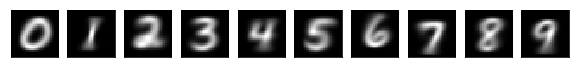

In [4]:
mean = []
pclass = []
fig, figarr = plt.subplots(1, 10, figsize=(10, 10))
for category in ans_dict:
    tmp = np.zeros((28, 28))
    for index in ans_dict[category]:
        img_arr = np.asarray(total[index]).reshape(28,28).astype(float)
        tmp = np.add(tmp, img_arr)  
    tmp = tmp / len(ans_dict[category])  
    mean.append(tmp)
    figarr[category].imshow(tmp, cmap='gray')
    figarr[category].axes.get_xaxis().set_visible(False)
    figarr[category].axes.get_yaxis().set_visible(False)
    pclass.append(len(ans_dict[category])/60000)
#     print('Class = %d, sample = %d' % (category, len(ans_dict[category])))
plt.show()
# print(pclass)
    

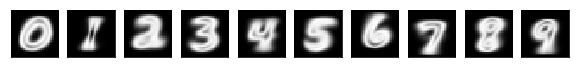

In [5]:
var = []
fig, figarr = plt.subplots(1, 10, figsize=(10, 10))
for category in ans_dict:
    tmp = np.ones((28, 28))
    for index in ans_dict[category]:
        img_arr = np.asarray(total[index]).reshape(28,28).astype(float)
        loc = (img_arr - mean[category])*(img_arr - mean[category])
        tmp = np.add(tmp, loc)  
    tmp = tmp / len(ans_dict[category])  
    var.append(tmp)
    figarr[category].imshow(tmp, cmap='gray')
    figarr[category].axes.get_xaxis().set_visible(False)
    figarr[category].axes.get_yaxis().set_visible(False)
#     print('Class = %d, sample = %d' % (category, len(ans_dict[category])))
plt.show()


# Loading testing label

In [6]:
with open("t10k-labels.idx1-ubyte", "rb") as f:
    
    byte = f.read(4)
    ts_magic_num = int.from_bytes(byte,byteorder='big')
    print('ts_magic_num = %d' % ts_magic_num)
    
    byte = f.read(4)
    ts_total_label = int.from_bytes(byte,byteorder='big')
    print('ts_total_label = %d' % ts_total_label)
    
    ts_ans = []
    ts_ans_dict={}
    for i in range(10):
        ts_ans_dict[i] = []
    for i in range(ts_total_label):
        byte = f.read(1)
        ts_label = int.from_bytes(byte,byteorder='big')
        ts_ans_dict[ts_label].append(i)
        ts_ans.append(ts_label)

ts_magic_num = 2049
ts_total_label = 10000


# Loading testing image

In [7]:
with open("t10k-images.idx3-ubyte", "rb") as f:
    byte = f.read(4)
    ts_magic_num = int.from_bytes(byte,byteorder='big')
    print('ts_magic_num = %d' % ts_magic_num)
    
    byte = f.read(4)
    ts_total_img = int.from_bytes(byte,byteorder='big')
    print('ts_total_img = %d' % ts_total_img)
    
    byte = f.read(4)
    rows = int.from_bytes(byte,byteorder='big')
    print('rows = %d' % rows)
    
    byte = f.read(4)
    cols = int.from_bytes(byte,byteorder='big')
    print('cols = %d' % cols)
    
#     generate pictures...
    ts_total = []
    for epoch in range(ts_total_img):
        ts_pic = []
        for i in range(28):
            ts_l = []
            for j in range(28):
                byte = f.read(1)
                ts_l.append(int.from_bytes(byte,byteorder='big', signed=False))
            ts_pic.append(np.asarray(ts_l))
        ts_total.append(ts_pic)

ts_magic_num = 2051
ts_total_img = 10000
rows = 28
cols = 28


Testing image...
7	2	1	0	4	1	4	9	5	9	

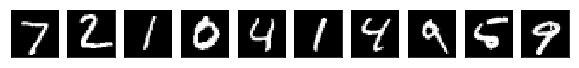

In [8]:
fig, figarr = plt.subplots(1, 10, figsize=(10, 10))
print('Testing image...')
for i in range(10):
    figarr[i].imshow(ts_total[i], cmap='gray')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)
    print('%s\t' % ts_ans[i], end='')
plt.show()
    

# Continuous mode

In [9]:
N = 10000
error = 0
for k in range(N):
    p = []
    for i in range(10):
        a = 2*np.pi*var[i]
        a = np.log(a.sum()) * (-392)
        b = ((ts_total[k] - mean[i])*(ts_total[k] - mean[i])) / (2*var[i])
        b = b.sum() * (-1)
        tmp = a + b
        p.append(tmp)
    p = np.array(p)
    p = (p / p.sum())
    print('Postirior (in log scale): ')
    for index, each_prob in enumerate(p):
        print('%d: %.10f' % (index, each_prob))
    print('Predict: %d, Ans: %d\n' % (ts_ans[k], np.argmin(p)))
    if ts_ans[k] != np.argmin(p):
        error += 1

print("error rate: %.4f" % (error/ N))

Postirior (in log scale): 
0: 0.2799646476
1: 0.1125767257
2: 0.2816202054
3: 0.0000064150
4: 0.0000060190
5: 0.0000056763
6: 0.3258032333
7: 0.0000050719
8: 0.0000068130
9: 0.0000051929
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0001876897
1: 0.0000112925
2: 0.0000038549
3: 0.0237474134
4: 0.0297347671
5: 0.0000066592
6: 0.0000069112
7: 0.5241847824
8: 0.0299471152
9: 0.3921695144
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000911628
1: 0.0000814481
2: 0.0000867140
3: 0.0000866274
4: 0.0000864642
5: 0.0000864121
6: 0.0000869023
7: 0.9992141149
8: 0.0000863595
9: 0.0000937948
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0679941557
1: 0.3066862969
2: 0.0706728504
3: 0.0706664998
4: 0.0718092894
5: 0.0700164479
6: 0.0696385773
7: 0.1249926210
8: 0.0701536768
9: 0.0773695848
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0877844535
1: 0.2151815998
2: 0.0874484502
3: 0.0878822927
4: 0.0844221305
5: 0.0864484632
6: 0.0921378560
7: 0.0870573193
8: 0.0865139462
9

Postirior (in log scale): 
0: 0.0000566289
1: 0.0000800453
2: 0.0000478960
3: 0.0000455625
4: 0.0000441261
5: 0.0000451974
6: 0.9995466528
7: 0.0000446997
8: 0.0000449062
9: 0.0000442852
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0577127033
1: 0.4237151697
2: 0.0554124633
3: 0.0574643260
4: 0.0598417847
5: 0.0562563803
6: 0.0570592813
7: 0.0960485090
8: 0.0571796777
9: 0.0793097048
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000990910
1: 0.0001103445
2: 0.0000949643
3: 0.0000934827
4: 0.0000963924
5: 0.0000945153
6: 0.0000949917
7: 0.9989712586
8: 0.0000950294
9: 0.0002499301
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0001279246
1: 0.0001554491
2: 0.0001281988
3: 0.0001245651
4: 0.0001274623
5: 0.0001247172
6: 0.9988264357
7: 0.0001324993
8: 0.0001251921
9: 0.0001275558
Predict: 5, Ans: 3

Postirior (in log scale): 
0: 0.0001014632
1: 0.0000990514
2: 0.0000953202
3: 0.0000940375
4: 0.0000955514
5: 0.0000945204
6: 0.0000967064
7: 0.9990742404
8: 0.0000948474
9

6: 0.0636592664
7: 0.0624665491
8: 0.0543063314
9: 0.0568059584
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000546090
1: 0.0000563904
2: 0.0000508754
3: 0.0000473195
4: 0.0000462106
5: 0.0000469338
6: 0.9995587181
7: 0.0000462353
8: 0.0000468764
9: 0.0000458315
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0891355184
1: 0.1678756406
2: 0.0869586213
3: 0.0883381657
4: 0.0856821155
5: 0.0864718225
6: 0.1354920553
7: 0.0888822030
8: 0.0856065040
9: 0.0855573536
Predict: 2, Ans: 9

Postirior (in log scale): 
0: 0.0062325158
1: 0.0161623313
2: 0.0061582800
3: 0.0058979914
4: 0.0059838551
5: 0.0058958387
6: 0.9350775944
7: 0.0065338904
8: 0.0059041867
9: 0.0061535161
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0177731798
1: 0.0392210474
2: 0.0174439876
3: 0.0178397326
4: 0.0172219131
5: 0.0175113260
6: 0.0173747583
7: 0.8200213650
8: 0.0172525828
9: 0.0183401074
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000285749
1: 0.0000316721
2: 0.0000222936
3: 0.00002029

Postirior (in log scale): 
0: 0.0819541321
1: 0.2000677515
2: 0.0836595727
3: 0.0793774829
4: 0.0804357867
5: 0.0793760905
6: 0.1383920239
7: 0.0857598014
8: 0.0800895235
9: 0.0908878348
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000858817
1: 0.0001299444
2: 0.0000778799
3: 0.7481605033
4: 0.0000955233
5: 0.0000880849
6: 0.0000798998
7: 0.2510582168
8: 0.0000984446
9: 0.0001256212
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.1939892553
1: 0.3629872986
2: 0.0969744353
3: 0.0000053101
4: 0.0000053332
5: 0.0000051287
6: 0.3459975031
7: 0.0000047346
8: 0.0000265208
9: 0.0000044803
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000361894
1: 0.0001482794
2: 0.0000307107
3: 0.0000289867
4: 0.0000273402
5: 0.0000280891
6: 0.9996168313
7: 0.0000275960
8: 0.0000283522
9: 0.0000276249
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000113655
1: 0.0000122265
2: 0.0000144121
3: 0.0000100645
4: 0.0000101353
5: 0.0000099467
6: 0.9999018268
7: 0.0000099871
8: 0.0000099882
9

Postirior (in log scale): 
0: 0.0000984179
1: 0.0001545832
2: 0.0000644562
3: 0.5051862865
4: 0.0001668863
5: 0.0000854323
6: 0.0000744102
7: 0.4937361806
8: 0.0003195480
9: 0.0001137987
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000397474
1: 0.0000381360
2: 0.0000390622
3: 0.0000378214
4: 0.0000391085
5: 0.0000379284
6: 0.9996497641
7: 0.0000416507
8: 0.0000376156
9: 0.0000391657
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0010778522
1: 0.0036443615
2: 0.0010326919
3: 0.0010274799
4: 0.0010168980
5: 0.0010191803
6: 0.9880926619
7: 0.0010400036
8: 0.0010226997
9: 0.0010261709
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000970626
1: 0.0002324443
2: 0.0000883736
3: 0.0000845114
4: 0.0000830748
5: 0.0000843605
6: 0.9990754895
7: 0.0000839137
8: 0.0000840260
9: 0.0000867437
Predict: 7, Ans: 4

Postirior (in log scale): 
0: 0.1031213088
1: 0.0909180708
2: 0.0969760819
3: 0.0964153430
4: 0.0971213985
5: 0.0962252460
6: 0.0963033066
7: 0.1268427040
8: 0.0961388811
9

Postirior (in log scale): 
0: 0.0000731441
1: 0.0001148281
2: 0.0000730596
3: 0.0000712203
4: 0.0000727586
5: 0.0000708210
6: 0.0000730715
7: 0.9973523416
8: 0.0000710885
9: 0.0020276668
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000058681
1: 0.0000390539
2: 0.0000052317
3: 0.0020765718
4: 0.0000065814
5: 0.0000058594
6: 0.0000053204
7: 0.5372483154
8: 0.0000065398
9: 0.4606006581
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000499707
1: 0.0000731262
2: 0.0000494019
3: 0.0000483125
4: 0.0000494933
5: 0.0000483428
6: 0.0000500971
7: 0.9995250547
8: 0.0000485584
9: 0.0000576425
Predict: 5, Ans: 3

Postirior (in log scale): 
0: 0.0001259170
1: 0.2767170517
2: 0.0000180983
3: 0.0000165559
4: 0.0000156697
5: 0.0000161891
6: 0.7230424613
7: 0.0000160805
8: 0.0000162794
9: 0.0000156972
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000076737
1: 0.0001852012
2: 0.0000075629
3: 0.0000081125
4: 0.0000074409
5: 0.0000075992
6: 0.0000075755
7: 0.9449324172
8: 0.0000089626
9

Postirior (in log scale): 
0: 0.1602486481
1: 0.0000457703
2: 0.1611921044
3: 0.0000155442
4: 0.0000148136
5: 0.0000149503
6: 0.6783951092
7: 0.0000145701
8: 0.0000441999
9: 0.0000142898
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.2427063869
1: 0.2253189661
2: 0.2441403702
3: 0.0000064744
4: 0.0000064445
5: 0.0000061065
6: 0.2877967550
7: 0.0000056564
8: 0.0000072041
9: 0.0000056358
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0002793168
1: 0.0002492612
2: 0.0002658216
3: 0.0002647947
4: 0.0002648673
5: 0.0002643538
6: 0.0002661724
7: 0.9976048209
8: 0.0002643503
9: 0.0002762409
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0025805544
1: 0.9622726517
2: 0.0027733724
3: 0.0137129356
4: 0.0027020113
5: 0.0029207848
6: 0.0026372982
7: 0.0030456144
8: 0.0029528757
9: 0.0044019016
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000196890
1: 0.0000297731
2: 0.0000197685
3: 0.0000191099
4: 0.0000193287
5: 0.0000190310
6: 0.9998139956
7: 0.0000209542
8: 0.0000191269
9

5: 0.0000157313
6: 0.9998360074
7: 0.0000157679
8: 0.0000157031
9: 0.0000152905
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000450323
1: 0.0000544478
2: 0.0000431628
3: 0.0000418995
4: 0.0000443830
5: 0.0000424613
6: 0.9995934005
7: 0.0000458204
8: 0.0000424079
9: 0.0000469845
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000776837
1: 0.0000957522
2: 0.0000866626
3: 0.0000674042
4: 0.0000674722
5: 0.0000676865
6: 0.9993355205
7: 0.0000677290
8: 0.0000674537
9: 0.0000666353
Predict: 3, Ans: 9

Postirior (in log scale): 
0: 0.0000407375
1: 0.0000487946
2: 0.0000390693
3: 0.0000388169
4: 0.0000389879
5: 0.0000387846
6: 0.9996370218
7: 0.0000389020
8: 0.0000382574
9: 0.0000406280
Predict: 3, Ans: 8

Postirior (in log scale): 
0: 0.2255055541
1: 0.0312729524
2: 0.2268397778
3: 0.0000069263
4: 0.0000065293
5: 0.0000062598
6: 0.5163433178
7: 0.0000057335
8: 0.0000071723
9: 0.0000057767
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000377298
1: 0.0000395154
2: 0.00003549

Postirior (in log scale): 
0: 0.0000451788
1: 0.0000501980
2: 0.0000442482
3: 0.0000447640
4: 0.0000418104
5: 0.0000415861
6: 0.8655353721
7: 0.1076024836
8: 0.0000413707
9: 0.0265529881
Predict: 4, Ans: 8

Postirior (in log scale): 
0: 0.2131546504
1: 0.4179257673
2: 0.0000092990
3: 0.0000090146
4: 0.0000076155
5: 0.0000083034
6: 0.3688607842
7: 0.0000081380
8: 0.0000087182
9: 0.0000077094
Predict: 9, Ans: 4

Postirior (in log scale): 
0: 0.0399513820
1: 0.0352507843
2: 0.0376640952
3: 0.0375581994
4: 0.0376502551
5: 0.0374680458
6: 0.0377448079
7: 0.6610325196
8: 0.0373755793
9: 0.0383043316
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000092672
1: 0.0000525931
2: 0.0000118826
3: 0.0000081352
4: 0.0000075484
5: 0.0000076897
6: 0.9998803250
7: 0.0000075232
8: 0.0000075944
9: 0.0000074410
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000333026
1: 0.0000562154
2: 0.0000326144
3: 0.0000319842
4: 0.0000342167
5: 0.0000321672
6: 0.0000336126
7: 0.9996653125
8: 0.0000323122
9

Postirior (in log scale): 
0: 0.0000751315
1: 0.0004451540
2: 0.0000728272
3: 0.0000754016
4: 0.0000711111
5: 0.0000731601
6: 0.0000805654
7: 0.9988568751
8: 0.0000732610
9: 0.0001765131
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000552253
1: 0.9993546334
2: 0.0000601286
3: 0.0000739609
4: 0.0000620691
5: 0.0000632277
6: 0.0000801234
7: 0.0000796850
8: 0.0000976131
9: 0.0000733334
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0002525041
1: 0.0190744130
2: 0.0002315222
3: 0.9772311977
4: 0.0002505156
5: 0.0003211195
6: 0.0002386747
7: 0.0003383960
8: 0.0002822248
9: 0.0017794324
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.1017679066
1: 0.1212204914
2: 0.0977969597
3: 0.0973088096
4: 0.0945760246
5: 0.0965284568
6: 0.1022296339
7: 0.0969161190
8: 0.0960776855
9: 0.0955779129
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0749385472
1: 0.1684368007
2: 0.0726971309
3: 0.0690408912
4: 0.0693723121
5: 0.0678276995
6: 0.2092676021
7: 0.1193377614
8: 0.0677170699
9

Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000689900
1: 0.0001275718
2: 0.0000602598
3: 0.9991975679
4: 0.0000758591
5: 0.0000720994
6: 0.0000632094
7: 0.0001490262
8: 0.0000857453
9: 0.0000996712
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000119532
1: 0.0000136345
2: 0.0000114758
3: 0.0000117336
4: 0.0000126544
5: 0.0000119256
6: 0.0000115201
7: 0.5142037969
8: 0.0000124101
9: 0.4856988958
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000157801
1: 0.0000182323
2: 0.0000170777
3: 0.0000111286
4: 0.0000108196
5: 0.0000104851
6: 0.9998820150
7: 0.0000117535
8: 0.0000105082
9: 0.0000121998
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000194776
1: 0.0000203776
2: 0.0000192822
3: 0.0000192425
4: 0.0000191951
5: 0.0000190245
6: 0.0000190851
7: 0.9998201860
8: 0.0000189752
9: 0.0000251541
Predict: 6, Ans: 8

Postirior (in log scale): 
0: 0.0000203090
1: 0.0007086902
2: 0.0000225312
3: 0.0000879980
4: 0.0000228741
5: 0.0000223460
6: 0.0000236937
7: 0.99900953

Postirior (in log scale): 
0: 0.0024842238
1: 0.0030949676
2: 0.0023590130
3: 0.0023240806
4: 0.0023220423
5: 0.0023317054
6: 0.0023669555
7: 0.9774774478
8: 0.0023302212
9: 0.0029093427
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0605252949
1: 0.4408628323
2: 0.0646024899
3: 0.0655512854
4: 0.0589848165
5: 0.0599648705
6: 0.0682860170
7: 0.0601457822
8: 0.0605515141
9: 0.0605250972
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0006981130
1: 0.0009585702
2: 0.0006929815
3: 0.0006739502
4: 0.0006696728
5: 0.0006679066
6: 0.9933386853
7: 0.0009351867
8: 0.0006703146
9: 0.0006946193
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0892479613
1: 0.1817123155
2: 0.0837726492
3: 0.0826015229
4: 0.0800375762
5: 0.0822422410
6: 0.1173615233
7: 0.0842367140
8: 0.0819359241
9: 0.1168515727
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0001114596
1: 0.0336812683
2: 0.0001539528
3: 0.0261440205
4: 0.0001394950
5: 0.0001275817
6: 0.9391367593
7: 0.0001969887
8: 0.0001295604
9

Postirior (in log scale): 
0: 0.0003964843
1: 0.5026261872
2: 0.0004414416
3: 0.1348581493
4: 0.0004652782
5: 0.0005065282
6: 0.0004241804
7: 0.3582981313
8: 0.0004614985
9: 0.0015221209
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.2231216907
1: 0.1716511809
2: 0.2244397312
3: 0.0000055377
4: 0.0000053057
5: 0.0000050259
6: 0.3807562598
7: 0.0000046573
8: 0.0000059819
9: 0.0000046289
Predict: 3, Ans: 9

Postirior (in log scale): 
0: 0.0000134594
1: 0.0000157519
2: 0.0000152053
3: 0.0000122442
4: 0.0000121067
5: 0.0000121748
6: 0.9998828854
7: 0.0000121011
8: 0.0000121436
9: 0.0000119276
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0028194632
1: 0.0039378170
2: 0.0017844137
3: 0.9693604212
4: 0.0039462833
5: 0.0021773752
6: 0.0020610705
7: 0.0042396692
8: 0.0069461368
9: 0.0027273498
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0001168824
1: 0.0003100428
2: 0.0000937258
3: 0.0001095733
4: 0.0001025030
5: 0.0000988794
6: 0.4670226528
7: 0.5319079451
8: 0.0000978565
9

Postirior (in log scale): 
0: 0.0902051238
1: 0.0966432367
2: 0.0882723314
3: 0.0885546447
4: 0.0912163710
5: 0.0888911258
6: 0.0919405630
7: 0.1727926553
8: 0.0886317997
9: 0.1028521486
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.2191524569
1: 0.1215844187
2: 0.2204455193
3: 0.0000049312
4: 0.0000052804
5: 0.0000046620
6: 0.4387577932
7: 0.0000041073
8: 0.0000367214
9: 0.0000041095
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0218261604
1: 0.0416206788
2: 0.0207388500
3: 0.0199073527
4: 0.0194858629
5: 0.0197496771
6: 0.7978996281
7: 0.0196759969
8: 0.0197083351
9: 0.0193874580
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0259045114
1: 0.7576492059
2: 0.0263126492
3: 0.0281840401
4: 0.0245611065
5: 0.0259284213
6: 0.0287722583
7: 0.0281586136
8: 0.0273011594
9: 0.0272280343
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000229988
1: 0.0000318111
2: 0.0000216022
3: 0.0000216720
4: 0.0000212802
5: 0.0000214644
6: 0.9997946652
7: 0.0000220844
8: 0.0000211547
9

8: 0.0000075590
9: 0.0000066837
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0001020140
1: 0.0001004270
2: 0.0000933495
3: 0.0000909161
4: 0.0000896870
5: 0.0000903748
6: 0.9991642367
7: 0.0000894879
8: 0.0000905132
9: 0.0000889938
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0013535518
1: 0.0014540440
2: 0.0012970499
3: 0.0012775171
4: 0.0012859758
5: 0.0012722408
6: 0.0012785495
7: 0.9880934004
8: 0.0012707831
9: 0.0014168877
Predict: 5, Ans: 8

Postirior (in log scale): 
0: 0.0000489426
1: 0.0000472966
2: 0.0000486554
3: 0.0000369298
4: 0.0000367552
5: 0.0000368359
6: 0.9996360004
7: 0.0000358008
8: 0.0000367784
9: 0.0000360048
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000031597
1: 0.0000050713
2: 0.0000027925
3: 0.0000028867
4: 0.0000039131
5: 0.0000033758
6: 0.0000028408
7: 0.5572383838
8: 0.0000045837
9: 0.4427329925
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0803040081
1: 0.2309759410
2: 0.0827274351
3: 0.0807325167
4: 0.0820746143
5: 0.08040100

Postirior (in log scale): 
0: 0.0001119245
1: 0.0014207213
2: 0.0001005770
3: 0.9966672921
4: 0.0001065650
5: 0.0001365474
6: 0.0000999508
7: 0.0001556377
8: 0.0001288608
9: 0.0010719234
Predict: 2, Ans: 6

Postirior (in log scale): 
0: 0.2370147604
1: 0.2649884052
2: 0.2384156934
3: 0.0000070524
4: 0.0000068133
5: 0.0000065370
6: 0.2595409761
7: 0.0000060554
8: 0.0000075831
9: 0.0000061237
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.2030509502
1: 0.0004803886
2: 0.2042485717
3: 0.0000070994
4: 0.0000066896
5: 0.0000064446
6: 0.5921413754
7: 0.0000059054
8: 0.0000466708
9: 0.0000059043
Predict: 7, Ans: 9

Postirior (in log scale): 
0: 0.0000088909
1: 0.0000680595
2: 0.0000024712
3: 0.0000042069
4: 0.0000044055
5: 0.0009893492
6: 0.0000026241
7: 0.5119258691
8: 0.1220289315
9: 0.3649651920
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000241099
1: 0.0000236668
2: 0.0000227422
3: 0.0000230045
4: 0.0000249488
5: 0.0000229891
6: 0.1371567470
7: 0.8626459836
8: 0.0000227901
9

Postirior (in log scale): 
0: 0.0000685603
1: 0.0000565298
2: 0.0000638423
3: 0.0000565092
4: 0.0000563003
5: 0.0000564928
6: 0.9994736912
7: 0.0000561777
8: 0.0000563496
9: 0.0000555467
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0001310248
1: 0.0001905015
2: 0.0001297576
3: 0.0001317989
4: 0.0001270124
5: 0.0001287208
6: 0.9987760050
7: 0.0001297951
8: 0.0001282323
9: 0.0001271516
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0968733393
1: 0.1455340617
2: 0.0914772864
3: 0.0907604338
4: 0.0895479015
5: 0.0897900090
6: 0.1236391664
7: 0.0938099927
8: 0.0891542254
9: 0.0894135838
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0129339727
1: 0.0147252304
2: 0.0124493492
3: 0.0122316612
4: 0.0127434451
5: 0.0123647029
6: 0.0126548546
7: 0.8837429910
8: 0.0123580870
9: 0.0137957058
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0003459305
1: 0.0003591545
2: 0.0003337915
3: 0.0003255345
4: 0.0003307872
5: 0.0003257114
6: 0.9969732347
7: 0.0003519554
8: 0.0003218774
9

2: 0.0000133618
3: 0.0000132995
4: 0.0000135792
5: 0.0000131622
6: 0.0000136815
7: 0.9998261254
8: 0.0000133241
9: 0.0000222515
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000079847
1: 0.0000174984
2: 0.0000080344
3: 0.0000080667
4: 0.0000087048
5: 0.0000081076
6: 0.0000079344
7: 0.5757363010
8: 0.0000084755
9: 0.4241888926
Predict: 0, Ans: 6

Postirior (in log scale): 
0: 0.0816239638
1: 0.2205082005
2: 0.0835233207
3: 0.0829051319
4: 0.0836901035
5: 0.0824921159
6: 0.0839062661
7: 0.1095244816
8: 0.0822898733
9: 0.0895365426
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000073526
1: 0.0000426732
2: 0.0000066060
3: 0.0000068835
4: 0.0000081290
5: 0.0000076478
6: 0.0000066541
7: 0.6034396038
8: 0.0000100656
9: 0.3964643844
Predict: 6, Ans: 2

Postirior (in log scale): 
0: 0.0000079602
1: 0.0000150212
2: 0.0000078413
3: 0.0000079258
4: 0.0000086456
5: 0.0000079264
6: 0.0000076235
7: 0.8009518952
8: 0.0000085246
9: 0.1989766363
Predict: 6, Ans: 6

Postirior (in log scale)

Postirior (in log scale): 
0: 0.1366257736
1: 0.1827946456
2: 0.0000647727
3: 0.1588746146
4: 0.0000068314
5: 0.0000066196
6: 0.5193776640
7: 0.0000514063
8: 0.0021921300
9: 0.0000055421
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0001010479
1: 0.0001196332
2: 0.0000996278
3: 0.0000978355
4: 0.0001051627
5: 0.0000988973
6: 0.0001033415
7: 0.9990288820
8: 0.0000995436
9: 0.0001460285
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000196640
1: 0.0000269504
2: 0.0000264925
3: 0.0000288057
4: 0.0000203403
5: 0.0000175847
6: 0.5134020504
7: 0.2715161925
8: 0.0000178503
9: 0.2149240691
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.1035424134
1: 0.0919508889
2: 0.0980935274
3: 0.0979644878
4: 0.0984032738
5: 0.0976211361
6: 0.0975065556
7: 0.1182514490
8: 0.0974568530
9: 0.0992094151
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.1909651018
1: 0.0022159469
2: 0.1920901641
3: 0.0000064605
4: 0.0000063891
5: 0.0000059953
6: 0.6146509836
7: 0.0000055285
8: 0.0000479816
9

Postirior (in log scale): 
0: 0.1003896496
1: 0.1241647220
2: 0.0976951696
3: 0.0968314350
4: 0.0949414739
5: 0.0961669026
6: 0.1014518895
7: 0.0970948047
8: 0.0965240199
9: 0.0947399331
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.1043091139
1: 0.0940630679
2: 0.1005207856
3: 0.0993749008
4: 0.0995205502
5: 0.0992101232
6: 0.1051981127
7: 0.0997647606
8: 0.0994251116
9: 0.0986134735
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0364044904
1: 0.1523613700
2: 0.0277988466
3: 0.0441362634
4: 0.0351259484
5: 0.0313052575
6: 0.0573941575
7: 0.0855671688
8: 0.0350067300
9: 0.4948997674
Predict: 5, Ans: 2

Postirior (in log scale): 
0: 0.0000243766
1: 0.0000307922
2: 0.0000234938
3: 0.0000228914
4: 0.0000246325
5: 0.0000236107
6: 0.0000242515
7: 0.6948618310
8: 0.0000242141
9: 0.3049399062
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0001495424
1: 0.0004358099
2: 0.0001530555
3: 0.0001527048
4: 0.0001533888
5: 0.0001518213
6: 0.0001530269
7: 0.9983351531
8: 0.0001512939
9

9: 0.0001444864
Predict: 2, Ans: 8

Postirior (in log scale): 
0: 0.0000428376
1: 0.0000448604
2: 0.0000354881
3: 0.0000324163
4: 0.0000321172
5: 0.0000323712
6: 0.9996834832
7: 0.0000325551
8: 0.0000322502
9: 0.0000316206
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000841531
1: 0.0017616050
2: 0.0000880479
3: 0.0000903283
4: 0.0000922694
5: 0.0000871559
6: 0.0000922329
7: 0.9975046255
8: 0.0000907561
9: 0.0001088259
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0001915167
1: 0.0002605489
2: 0.0001800329
3: 0.0001793590
4: 0.0001831917
5: 0.0001783408
6: 0.0001864749
7: 0.9982479605
8: 0.0001760182
9: 0.0002165564
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0835647375
1: 0.1760183241
2: 0.0841459114
3: 0.0803690550
4: 0.0813474883
5: 0.0809173809
6: 0.1071171918
7: 0.0852888133
8: 0.0818306557
9: 0.1394004421
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.1040759746
1: 0.0937191497
2: 0.0999958480
3: 0.0986763029
4: 0.0987976141
5: 0.0986925127
6: 0.11040558

Postirior (in log scale): 
0: 0.0004229581
1: 0.0003758051
2: 0.0004007553
3: 0.0004006418
4: 0.0004000161
5: 0.0003992953
6: 0.0003995927
7: 0.9963885238
8: 0.0003985429
9: 0.0004138690
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000258809
1: 0.0000571402
2: 0.0000086231
3: 0.0000080068
4: 0.2903857603
5: 0.0989832372
6: 0.4057713317
7: 0.0293283948
8: 0.0000209824
9: 0.1754106427
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000290226
1: 0.0001183779
2: 0.0000169985
3: 0.0002089389
4: 0.0000177019
5: 0.0000183939
6: 0.5011274866
7: 0.4940118568
8: 0.0000315406
9: 0.0044196822
Predict: 4, Ans: 2

Postirior (in log scale): 
0: 0.1565711410
1: 0.0829999051
2: 0.1574944588
3: 0.0000091994
4: 0.0000090230
5: 0.0000089214
6: 0.6028787558
7: 0.0000083523
8: 0.0000118138
9: 0.0000084293
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000362933
1: 0.0002367002
2: 0.0000361463
3: 0.0000349020
4: 0.0000355864
5: 0.0000347775
6: 0.9994717482
7: 0.0000407001
8: 0.0000356648
9

Postirior (in log scale): 
0: 0.1039006389
1: 0.0913541522
2: 0.0972977119
3: 0.0966338253
4: 0.0974890334
5: 0.0964246401
6: 0.0966318690
7: 0.1236475684
8: 0.0961947312
9: 0.1004258297
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000269046
1: 0.0000883664
2: 0.0000249392
3: 0.0000253534
4: 0.0000268376
5: 0.0000252425
6: 0.9997026800
7: 0.0000273370
8: 0.0000253972
9: 0.0000269421
Predict: 7, Ans: 2

Postirior (in log scale): 
0: 0.1067621046
1: 0.0932562279
2: 0.0998967575
3: 0.0987956534
4: 0.0988560731
5: 0.0987403042
6: 0.1084619845
7: 0.0988808330
8: 0.0985743791
9: 0.0977756828
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0011300780
1: 0.0010516928
2: 0.0010374075
3: 0.0010373598
4: 0.0010422227
5: 0.0010415549
6: 0.0010347376
7: 0.9053352176
8: 0.0010421838
9: 0.0862475454
Predict: 1, Ans: 6

Postirior (in log scale): 
0: 0.2050133296
1: 0.1719623946
2: 0.2062240031
3: 0.0000080605
4: 0.0000080680
5: 0.0000077715
6: 0.4167528181
7: 0.0000074769
8: 0.0000087479
9

3: 0.0000186254
4: 0.0000186191
5: 0.0000183922
6: 0.0000184388
7: 0.9998140751
8: 0.0000183361
9: 0.0000338843
Predict: 6, Ans: 8

Postirior (in log scale): 
0: 0.0044690697
1: 0.0094862957
2: 0.0042912636
3: 0.0042911957
4: 0.0041976212
5: 0.0042475139
6: 0.0042473322
7: 0.9561195878
8: 0.0042537272
9: 0.0043963931
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000583328
1: 0.0022090494
2: 0.0000674228
3: 0.0019569680
4: 0.0000627001
5: 0.0000605158
6: 0.0000687460
7: 0.0040593888
8: 0.0000646075
9: 0.9913922689
Predict: 6, Ans: 0

Postirior (in log scale): 
0: 0.0001885713
1: 0.0001833413
2: 0.0001788662
3: 0.0001783319
4: 0.0001817237
5: 0.0001784236
6: 0.0001879299
7: 0.9983531980
8: 0.0001762123
9: 0.0001934017
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0044117724
1: 0.0072269039
2: 0.0042017366
3: 0.0041354582
4: 0.0040412778
5: 0.0041099590
6: 0.9594900084
7: 0.0042429502
8: 0.0040892370
9: 0.0040506964
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.00006241

Postirior (in log scale): 
0: 0.0000428020
1: 0.0003196453
2: 0.0000318178
3: 0.0000312571
4: 0.0000338998
5: 0.0000397557
6: 0.0000432987
7: 0.9037873580
8: 0.0000355885
9: 0.0956345770
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0088639270
1: 0.0192642959
2: 0.0088413351
3: 0.0082435205
4: 0.0078966727
5: 0.0080673931
6: 0.9148792876
7: 0.0079992963
8: 0.0080622332
9: 0.0078820386
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0001473909
1: 0.0005290126
2: 0.0001478611
3: 0.0001460571
4: 0.0001489954
5: 0.0001451977
6: 0.0001457795
7: 0.9982264905
8: 0.0001457928
9: 0.0002174223
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0004631310
1: 0.0004945758
2: 0.0004486684
3: 0.0004366054
4: 0.0004340507
5: 0.0004357680
6: 0.9959617644
7: 0.0004583217
8: 0.0004331124
9: 0.0004340024
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000701818
1: 0.0002125762
2: 0.0000723462
3: 0.0000719514
4: 0.0000722869
5: 0.0000713615
6: 0.0000714828
7: 0.9992036983
8: 0.0000714231
9

Postirior (in log scale): 
0: 0.1017734161
1: 0.0899947852
2: 0.0959145235
3: 0.0952844825
4: 0.0964791469
5: 0.0953580432
6: 0.0956313242
7: 0.1341968561
8: 0.0952924257
9: 0.1000749967
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.2208354905
1: 0.0051485427
2: 0.2221372659
3: 0.0000072538
4: 0.0000076634
5: 0.0000073407
6: 0.5517825515
7: 0.0000062702
8: 0.0000609080
9: 0.0000067133
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000701468
1: 0.0003787350
2: 0.0000723184
3: 0.0000737330
4: 0.0000737508
5: 0.0000727231
6: 0.0000712056
7: 0.9990223511
8: 0.0000722564
9: 0.0000927800
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0001324851
1: 0.0037906659
2: 0.0001828962
3: 0.0002467167
4: 0.0001255436
5: 0.0001318236
6: 0.0001690076
7: 0.5510005770
8: 0.0001403064
9: 0.4440799778
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0001174548
1: 0.2016125926
2: 0.0000338243
3: 0.0000314566
4: 0.0000309827
5: 0.0000311804
6: 0.7980495513
7: 0.0000310994
8: 0.0000312659
9

Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0504753848
1: 0.4666480245
2: 0.0510677475
3: 0.0492293990
4: 0.0474769512
5: 0.0473034416
6: 0.1365841148
7: 0.0537105567
8: 0.0481402827
9: 0.0493640971
Predict: 3, Ans: 5

Postirior (in log scale): 
0: 0.0000463022
1: 0.0000405902
2: 0.0000433134
3: 0.0000431399
4: 0.0000434692
5: 0.0000430812
6: 0.9996100515
7: 0.0000440373
8: 0.0000428492
9: 0.0000431658
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000628980
1: 0.0001949320
2: 0.0000645064
3: 0.0000631297
4: 0.0000643930
5: 0.0000633705
6: 0.9992923878
7: 0.0000663702
8: 0.0000633198
9: 0.0000646926
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.1024743633
1: 0.0908645733
2: 0.0969841228
3: 0.0967472505
4: 0.0972796105
5: 0.0963962647
6: 0.0965370238
7: 0.1272720765
8: 0.0961940738
9: 0.0992506408
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000068088
1: 0.0000065936
2: 0.0000063531
3: 0.0000064944
4: 0.0000075101
5: 0.0000066371
6: 0.0000064905
7: 0.56712458

Postirior (in log scale): 
0: 0.0000036197
1: 0.0000587163
2: 0.0000032761
3: 0.0000034996
4: 0.0000047097
5: 0.0000037159
6: 0.0000035700
7: 0.5762485624
8: 0.0000046783
9: 0.4236656522
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.1022497279
1: 0.0938738399
2: 0.0990905427
3: 0.0982436229
4: 0.0982746149
5: 0.0981167354
6: 0.0989574265
7: 0.1113355477
8: 0.0984835118
9: 0.1013744303
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.2247992478
1: 0.0922533849
2: 0.2261259093
3: 0.0000039015
4: 0.0000039407
5: 0.0000034758
6: 0.4567670609
7: 0.0000028561
8: 0.0000372612
9: 0.0000029618
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000108927
1: 0.0000512729
2: 0.0000111695
3: 0.0000113086
4: 0.0000120405
5: 0.0000113843
6: 0.0000109852
7: 0.5128733756
8: 0.0000118616
9: 0.4869957092
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000236259
1: 0.0000220457
2: 0.0000240086
3: 0.0000204317
4: 0.0000202691
5: 0.0000203398
6: 0.9998092468
7: 0.0000199438
8: 0.0000201710
9

Postirior (in log scale): 
0: 0.2321289851
1: 0.0000466885
2: 0.2334987517
3: 0.0000072107
4: 0.0000068897
5: 0.0000068306
6: 0.5342394417
7: 0.0000059240
8: 0.0000530775
9: 0.0000062005
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000248767
1: 0.0000417215
2: 0.0000250774
3: 0.0000244898
4: 0.0000249364
5: 0.0000242431
6: 0.0000249422
7: 0.9951038099
8: 0.0000244601
9: 0.0046814428
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000208748
1: 0.0000439824
2: 0.0000198029
3: 0.0000195618
4: 0.0000207978
5: 0.0000196075
6: 0.9997924098
7: 0.0000227143
8: 0.0000194515
9: 0.0000207973
Predict: 7, Ans: 8

Postirior (in log scale): 
0: 0.1032993487
1: 0.0951541387
2: 0.0988494338
3: 0.0972536268
4: 0.0969852306
5: 0.0968059599
6: 0.1202871767
7: 0.0988259638
8: 0.0962653411
9: 0.0962737798
Predict: 8, Ans: 1

Postirior (in log scale): 
0: 0.0549685760
1: 0.0907794860
2: 0.0000036678
3: 0.0824305786
4: 0.0785471732
5: 0.0728879628
6: 0.0000035087
7: 0.2525710825
8: 0.0786785339
9

4: 0.0000120113
5: 0.0000116296
6: 0.0000114210
7: 0.5684301364
8: 0.0000119765
9: 0.4314759701
Predict: 2, Ans: 6

Postirior (in log scale): 
0: 0.2204339205
1: 0.0223148906
2: 0.2217348291
3: 0.0000069988
4: 0.0000067873
5: 0.0000066345
6: 0.5354687525
7: 0.0000060345
8: 0.0000149816
9: 0.0000061706
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000465756
1: 0.0000570803
2: 0.0000405304
3: 0.0000379238
4: 0.0000371119
5: 0.0000377212
6: 0.9996305448
7: 0.0000377182
8: 0.0000378228
9: 0.0000369710
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0000128849
1: 0.0010701005
2: 0.0000033500
3: 0.0006445649
4: 0.0764596647
5: 0.1107499084
6: 0.0000028687
7: 0.3946255651
8: 0.1195352083
9: 0.2968958845
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0009748224
1: 0.0710333493
2: 0.0010401549
3: 0.0013342791
4: 0.0011094803
5: 0.0010946509
6: 0.0010394300
7: 0.9188744333
8: 0.0012078028
9: 0.0022915969
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.1036481870
1: 0.09278937

Postirior (in log scale): 
0: 0.1010656165
1: 0.1262271897
2: 0.0975241015
3: 0.0966768128
4: 0.0946622308
5: 0.0962036470
6: 0.0999488646
7: 0.0966085345
8: 0.0961897565
9: 0.0948932462
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000361316
1: 0.0000619998
2: 0.0000329372
3: 0.0000323745
4: 0.0000358129
5: 0.0000341622
6: 0.0000361153
7: 0.7459954343
8: 0.0000358545
9: 0.2536991777
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.2340781032
1: 0.0132655719
2: 0.2354603635
3: 0.0000099019
4: 0.0000096003
5: 0.0000094140
6: 0.5171367972
7: 0.0000088221
8: 0.0000125827
9: 0.0000088433
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0946843277
1: 0.1089745174
2: 0.0887658111
3: 0.0867684056
4: 0.0865829194
5: 0.0862119382
6: 0.1832685307
7: 0.0932956617
8: 0.0854497750
9: 0.0859981131
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0001002369
1: 0.0002951116
2: 0.0001039199
3: 0.0000998346
4: 0.0001037272
5: 0.0001001601
6: 0.9988853925
7: 0.0001067521
8: 0.0001004792
9

Postirior (in log scale): 
0: 0.1034220109
1: 0.0963196188
2: 0.0967895498
3: 0.0956737847
4: 0.0964354079
5: 0.0955112595
6: 0.0974999027
7: 0.1203179341
8: 0.0954203514
9: 0.1026101802
Predict: 1, Ans: 8

Postirior (in log scale): 
0: 0.0000422766
1: 0.0000958372
2: 0.0000417027
3: 0.0000412756
4: 0.0000428067
5: 0.0000400068
6: 0.0000436333
7: 0.9992219247
8: 0.0000404513
9: 0.0003900853
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000034914
1: 0.0000049775
2: 0.0000032444
3: 0.0000033971
4: 0.0000043105
5: 0.0000036341
6: 0.0000033448
7: 0.5795994520
8: 0.0000042563
9: 0.4203698918
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0960695965
1: 0.1229082764
2: 0.0913353264
3: 0.0882798178
4: 0.0882689984
5: 0.0883531036
6: 0.1506329374
7: 0.0923521920
8: 0.0883220404
9: 0.0934777112
Predict: 8, Ans: 4

Postirior (in log scale): 
0: 0.0016044606
1: 0.0055729567
2: 0.0016418024
3: 0.0015680712
4: 0.0015947618
5: 0.0015496563
6: 0.9815940188
7: 0.0016905582
8: 0.0015700820
9

Postirior (in log scale): 
0: 0.0157900559
1: 0.0279153804
2: 0.0147989523
3: 0.0141915564
4: 0.0145994660
5: 0.0146051818
6: 0.0187561767
7: 0.0154337755
8: 0.0150064192
9: 0.8489030357
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0016990824
1: 0.0016512435
2: 0.0016634846
3: 0.0016292569
4: 0.0017389074
5: 0.0016419266
6: 0.0017460833
7: 0.9845889531
8: 0.0016447189
9: 0.0019963434
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0001419904
1: 0.0002078081
2: 0.0001410215
3: 0.0001399760
4: 0.0001379811
5: 0.0001396882
6: 0.9986793318
7: 0.0001362648
8: 0.0001388340
9: 0.0001371040
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000140583
1: 0.0000117760
2: 0.0000030016
3: 0.0000051107
4: 0.0819505817
5: 0.1322244626
6: 0.0000029111
7: 0.3298565839
8: 0.1427132014
9: 0.3132183127
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.1022058046
1: 0.1078480117
2: 0.0992359749
3: 0.0977642455
4: 0.0969774660
5: 0.0969565038
6: 0.1067847103
7: 0.0993894511
8: 0.0966385793
9

Postirior (in log scale): 
0: 0.1948091222
1: 0.0490001771
2: 0.1959625388
3: 0.0000048312
4: 0.0000044337
5: 0.0000041932
6: 0.5602021302
7: 0.0000037308
8: 0.0000050714
9: 0.0000037715
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000210545
1: 0.0000222420
2: 0.0000209618
3: 0.0000206039
4: 0.0000316248
5: 0.0000206466
6: 0.5526001918
7: 0.4472142842
8: 0.0000207669
9: 0.0000276237
Predict: 5, Ans: 3

Postirior (in log scale): 
0: 0.2019619181
1: 0.0000291537
2: 0.2031528973
3: 0.0000112261
4: 0.0000107726
5: 0.0000105720
6: 0.5947528182
7: 0.0000099675
8: 0.0000506511
9: 0.0000100235
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0021706179
1: 0.0026029185
2: 0.0021225112
3: 0.0020238671
4: 0.0020705426
5: 0.0020486094
6: 0.9800423390
7: 0.0021277233
8: 0.0020583885
9: 0.0027324824
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0110987409
1: 0.0000102067
2: 0.0000028789
3: 0.0000047589
4: 0.0561024673
5: 0.0657064546
6: 0.0000028835
7: 0.4332150616
8: 0.0709197327
9

Postirior (in log scale): 
0: 0.0000922984
1: 0.0001089267
2: 0.0000880395
3: 0.0000876898
4: 0.0000877159
5: 0.0000856080
6: 0.9991784598
7: 0.0000973259
8: 0.0000835382
9: 0.0000903979
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000428369
1: 0.0189206983
2: 0.0001036326
3: 0.7005433212
4: 0.0000259950
5: 0.0000248539
6: 0.0000320691
7: 0.2627464429
8: 0.0000247275
9: 0.0175354226
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000479937
1: 0.0013258563
2: 0.0000604981
3: 0.2123466198
4: 0.0000473290
5: 0.0000434243
6: 0.7857807497
7: 0.0002468671
8: 0.0000439557
9: 0.0000567063
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0052820448
1: 0.3828487408
2: 0.0000229888
3: 0.0000220455
4: 0.0000202852
5: 0.0000210671
6: 0.6117204044
7: 0.0000210152
8: 0.0000212882
9: 0.0000201200
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000072935
1: 0.0000116081
2: 0.0000068910
3: 0.0000072333
4: 0.0000078988
5: 0.0000071447
6: 0.0000071519
7: 0.8893158992
8: 0.0000074002
9

5: 0.0760747961
6: 0.0837007420
7: 0.0758782845
8: 0.0767843723
9: 0.0745555877
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0003954950
1: 0.0003908186
2: 0.0003924851
3: 0.0003758083
4: 0.0003812185
5: 0.0003773558
6: 0.9965135207
7: 0.0003951213
8: 0.0003785669
9: 0.0003996097
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000311078
1: 0.0000410455
2: 0.0000271783
3: 0.0000234850
4: 0.0000228983
5: 0.0000231292
6: 0.9997629101
7: 0.0000227003
8: 0.0000227315
9: 0.0000228139
Predict: 8, Ans: 7

Postirior (in log scale): 
0: 0.0000153130
1: 0.0000152435
2: 0.0000148912
3: 0.0000143651
4: 0.0000150716
5: 0.0000144538
6: 0.9998663456
7: 0.0000150866
8: 0.0000144359
9: 0.0000147938
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.2001457476
1: 0.0000307020
2: 0.2013258056
3: 0.0000077507
4: 0.0000073682
5: 0.0000071716
6: 0.5984165190
7: 0.0000067507
8: 0.0000455606
9: 0.0000066239
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.2909329179
1: 0.3775718487
2: 0.00000972

Postirior (in log scale): 
0: 0.0000293654
1: 0.0000273166
2: 0.0000247960
3: 0.0000218178
4: 0.0000215466
5: 0.0000216463
6: 0.9997894226
7: 0.0000212325
8: 0.0000216740
9: 0.0000211822
Predict: 7, Ans: 9

Postirior (in log scale): 
0: 0.0002253249
1: 0.0002931645
2: 0.0002164666
3: 0.0002160897
4: 0.0002122256
5: 0.0002138830
6: 0.0002121960
7: 0.9979716309
8: 0.0002136617
9: 0.0002253569
Predict: 4, Ans: 6

Postirior (in log scale): 
0: 0.1935787232
1: 0.2165584304
2: 0.1947228416
3: 0.0692216518
4: 0.0659587542
5: 0.0000042852
6: 0.1938892840
7: 0.0000025031
8: 0.0660607623
9: 0.0000027642
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.1034095146
1: 0.0917139982
2: 0.0976628722
3: 0.0967847922
4: 0.0977481015
5: 0.0967874823
6: 0.0973434768
7: 0.1217671072
8: 0.0968024645
9: 0.0999801905
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.1025086921
1: 0.0917296663
2: 0.0981522595
3: 0.0974492189
4: 0.0975604757
5: 0.0971644695
6: 0.1235555179
7: 0.0980164580
8: 0.0971492588
9

Postirior (in log scale): 
0: 0.0000524799
1: 0.0000527179
2: 0.0000510855
3: 0.0000510902
4: 0.0000718653
5: 0.0000512875
6: 0.9994714673
7: 0.0000851242
8: 0.0000512425
9: 0.0000616396
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000099933
1: 0.0000094474
2: 0.0000108780
3: 0.0000072874
4: 0.0000075669
5: 0.0000073495
6: 0.9999257439
7: 0.0000071676
8: 0.0000073363
9: 0.0000072297
Predict: 3, Ans: 7

Postirior (in log scale): 
0: 0.0046715016
1: 0.0043471630
2: 0.0045340424
3: 0.0044391400
4: 0.0044675313
5: 0.0044521017
6: 0.9595760140
7: 0.0046109288
8: 0.0044468610
9: 0.0044547161
Predict: 3, Ans: 1

Postirior (in log scale): 
0: 0.0000159642
1: 0.0000428752
2: 0.0000176903
3: 0.0000146831
4: 0.0000140348
5: 0.0000143019
6: 0.9998384916
7: 0.0000141330
8: 0.0000139952
9: 0.0000138307
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.2112549825
1: 0.0081258155
2: 0.2125001169
3: 0.0000082513
4: 0.0000084634
5: 0.0000078457
6: 0.5680198834
7: 0.0000072922
8: 0.0000602100
9

0: 0.0000409089
1: 0.0000794284
2: 0.0000484991
3: 0.0000372996
4: 0.0000371260
5: 0.0000370284
6: 0.9996090396
7: 0.0000368718
8: 0.0000371294
9: 0.0000366688
Predict: 0, Ans: 9

Postirior (in log scale): 
0: 0.0000139581
1: 0.0018235760
2: 0.0000156765
3: 0.0010416612
4: 0.0000119902
5: 0.0000125149
6: 0.9970440853
7: 0.0000121671
8: 0.0000114957
9: 0.0000128750
Predict: 7, Ans: 8

Postirior (in log scale): 
0: 0.0000210739
1: 0.0000245747
2: 0.0000200700
3: 0.0000196212
4: 0.0000195001
5: 0.0000195217
6: 0.9998146042
7: 0.0000220040
8: 0.0000192732
9: 0.0000197571
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000678024
1: 0.0001470498
2: 0.0000585486
3: 0.0000678270
4: 0.0000607626
5: 0.0000603675
6: 0.2623742534
7: 0.7152582223
8: 0.0000606575
9: 0.0218445089
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0832272051
1: 0.2669259288
2: 0.0792342517
3: 0.0806108848
4: 0.0793793052
5: 0.0799860633
6: 0.0799027359
7: 0.0804455125
8: 0.0801204085
9: 0.0901677041
Predict: 2, 

Postirior (in log scale): 
0: 0.0000054605
1: 0.0000151392
2: 0.0000031550
3: 0.0000055011
4: 0.0000703387
5: 0.0956752120
6: 0.0000030445
7: 0.4087010094
8: 0.1142233496
9: 0.3812977901
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0003339184
1: 0.0003983426
2: 0.0003210635
3: 0.0003194424
4: 0.0003142646
5: 0.0003176344
6: 0.0003158158
7: 0.9970357806
8: 0.0003168747
9: 0.0003268630
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.1050786449
1: 0.0932747254
2: 0.0998480053
3: 0.0989023089
4: 0.0991885734
5: 0.0987897612
6: 0.1087177741
7: 0.0993939948
8: 0.0987788229
9: 0.0980273891
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000250713
1: 0.0000251364
2: 0.0000202647
3: 0.0000167861
4: 0.0000165325
5: 0.0000165150
6: 0.9998302605
7: 0.0000164803
8: 0.0000164618
9: 0.0000164914
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000047632
1: 0.0000157935
2: 0.0000038541
3: 0.0000040639
4: 0.0000059785
5: 0.0000053349
6: 0.0000039628
7: 0.5297063007
8: 0.0000095671
9

Postirior (in log scale): 
0: 0.0270384368
1: 0.7452228181
2: 0.0278575640
3: 0.0288703441
4: 0.0258733202
5: 0.0272446739
6: 0.0331609537
7: 0.0276221599
8: 0.0300080177
9: 0.0271017116
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0376191091
1: 0.0742867281
2: 0.0374140151
3: 0.0372272354
4: 0.0363440994
5: 0.0366942671
6: 0.6309340386
7: 0.0370956862
8: 0.0361829055
9: 0.0362019154
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000460944
1: 0.0001462148
2: 0.0000350406
3: 0.0000346852
4: 0.0000364695
5: 0.0000412261
6: 0.9994951078
7: 0.0000409594
8: 0.0000362647
9: 0.0000879375
Predict: 2, Ans: 3

Postirior (in log scale): 
0: 0.0000033852
1: 0.0000041085
2: 0.0000031849
3: 0.0000032543
4: 0.0000041613
5: 0.0000034128
6: 0.0000033619
7: 0.6898690419
8: 0.0000039544
9: 0.3101021348
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000294514
1: 0.0010023873
2: 0.0000253883
3: 0.0000249899
4: 0.0000227349
5: 0.0000230006
6: 0.9987974523
7: 0.0000261761
8: 0.0000233131
9

6: 0.0984197446
7: 0.0816540779
8: 0.0808092696
9: 0.0795113141
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.1020896020
1: 0.0913920742
2: 0.0964387501
3: 0.0952321861
4: 0.0965115736
5: 0.0952326647
6: 0.0960344238
7: 0.1303129175
8: 0.0951546983
9: 0.1016011096
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000178849
1: 0.1764493230
2: 0.0000202923
3: 0.0000267606
4: 0.0000205128
5: 0.0000205382
6: 0.0000268016
7: 0.8166265180
8: 0.0000312613
9: 0.0067601074
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000598210
1: 0.0000576123
2: 0.0000568578
3: 0.0000555291
4: 0.0000555549
5: 0.0000552604
6: 0.9994871190
7: 0.0000621062
8: 0.0000545332
9: 0.0000556063
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000444638
1: 0.0000654844
2: 0.0000412846
3: 0.0000340408
4: 0.0000325109
5: 0.0000333873
6: 0.9996498912
7: 0.0000333695
8: 0.0000330135
9: 0.0000325541
Predict: 9, Ans: 4

Postirior (in log scale): 
0: 0.0055620298
1: 0.3964089576
2: 0.0066891008
3: 0.55123954

Postirior (in log scale): 
0: 0.2206921216
1: 0.0771855815
2: 0.2219950417
3: 0.0000091936
4: 0.0000091088
5: 0.0000091309
6: 0.4800728180
7: 0.0000082290
8: 0.0000100933
9: 0.0000086816
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.1032242106
1: 0.0939453134
2: 0.1002239767
3: 0.0993736800
4: 0.0993463135
5: 0.0991203996
6: 0.1073178898
7: 0.0994598945
8: 0.0993802247
9: 0.0986080972
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000032209
1: 0.0878835958
2: 0.0000030165
3: 0.0000030315
4: 0.0000042449
5: 0.0000034051
6: 0.0000035641
7: 0.5285108721
8: 0.0000059372
9: 0.3835791118
Predict: 3, Ans: 2

Postirior (in log scale): 
0: 0.0000470221
1: 0.0000411281
2: 0.0000429316
3: 0.0000393817
4: 0.0000393553
5: 0.0000393583
6: 0.9996335059
7: 0.0000388167
8: 0.0000394542
9: 0.0000390460
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000587026
1: 0.0000623882
2: 0.0000567130
3: 0.0000556401
4: 0.0000570059
5: 0.0000562643
6: 0.0000564176
7: 0.9733784974
8: 0.0000567521
9

Postirior (in log scale): 
0: 0.0005289632
1: 0.0009019626
2: 0.0005188016
3: 0.0005107117
4: 0.0005355249
5: 0.0005159308
6: 0.0005457873
7: 0.9947308116
8: 0.0005159782
9: 0.0006955282
Predict: 8, Ans: 3

Postirior (in log scale): 
0: 0.1013785952
1: 0.0893175165
2: 0.0951518819
3: 0.0941300095
4: 0.0956469509
5: 0.0943134145
6: 0.0950282325
7: 0.1420698912
8: 0.0941476000
9: 0.0988159078
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0008885097
1: 0.0174684357
2: 0.0009685853
3: 0.0010054276
4: 0.0009584914
5: 0.0009437341
6: 0.9746897325
7: 0.0011083222
8: 0.0009551618
9: 0.0010135998
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0512305676
1: 0.1277540642
2: 0.0604371306
3: 0.0527581820
4: 0.0468371337
5: 0.0476271144
6: 0.4644188486
7: 0.0500464510
8: 0.0473939683
9: 0.0514965396
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0921785707
1: 0.0870339760
2: 0.0900037740
3: 0.0887335006
4: 0.0903674500
5: 0.0887597155
6: 0.0989533941
7: 0.1816574295
8: 0.0890014703
9

1: 0.1045133864
2: 0.0000222644
3: 0.0000240960
4: 0.0000241432
5: 0.0000223635
6: 0.0000260243
7: 0.8952889538
8: 0.0000260402
9: 0.0000322705
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000504317
1: 0.0147023881
2: 0.0000335259
3: 0.0000318923
4: 0.0000302521
5: 0.0000310512
6: 0.9850285662
7: 0.0000308234
8: 0.0000310240
9: 0.0000300451
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0087806495
1: 0.0156083013
2: 0.0076871276
3: 0.0074383524
4: 0.0073741586
5: 0.0074660612
6: 0.8468279249
7: 0.0083757382
8: 0.0074947690
9: 0.0829469172
Predict: 8, Ans: 4

Postirior (in log scale): 
0: 0.0000471117
1: 0.0001449218
2: 0.0000464014
3: 0.0000464139
4: 0.0000482204
5: 0.0000463057
6: 0.0000450619
7: 0.9977503651
8: 0.0000466475
9: 0.0017785506
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0705635657
1: 0.0016825103
2: 0.0000032890
3: 0.0015224774
4: 0.0983885044
5: 0.0912984486
6: 0.0000032518
7: 0.3743154508
8: 0.0985418261
9: 0.2636806759
Predict: 2, Ans: 6

Postirio

Postirior (in log scale): 
0: 0.0996714746
1: 0.1351286011
2: 0.0959386775
3: 0.0943089887
4: 0.0921836709
5: 0.0938374448
6: 0.1057908258
7: 0.0953196620
8: 0.0937799604
9: 0.0940406941
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000432201
1: 0.0000467597
2: 0.0000367190
3: 0.0000342288
4: 0.0000338315
5: 0.0000341034
6: 0.9996695431
7: 0.0000339563
8: 0.0000341760
9: 0.0000334620
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000187365
1: 0.0000341870
2: 0.0000149950
3: 0.0000149820
4: 0.0000164718
5: 0.0000167760
6: 0.0000162369
7: 0.0158066415
8: 0.0000272726
9: 0.9840337008
Predict: 2, Ans: 3

Postirior (in log scale): 
0: 0.0785306167
1: 0.2513518022
2: 0.0786055204
3: 0.0769862347
4: 0.0769171912
5: 0.0760720060
6: 0.1119783853
7: 0.0929283456
8: 0.0771844245
9: 0.0794454734
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000274452
1: 0.0000239418
2: 0.0000252536
3: 0.0000255060
4: 0.0000255620
5: 0.0000254006
6: 0.0000265784
7: 0.9997648184
8: 0.0000251327
9

Postirior (in log scale): 
0: 0.0018607950
1: 0.0020835581
2: 0.0017292882
3: 0.0017365974
4: 0.0017969390
5: 0.0017539292
6: 0.0017720331
7: 0.9832297591
8: 0.0017457031
9: 0.0022913978
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000122514
1: 0.0000174045
2: 0.0000159965
3: 0.0000097412
4: 0.0000098674
5: 0.0000097225
6: 0.9998957904
7: 0.0000098408
8: 0.0000098120
9: 0.0000095735
Predict: 5, Ans: 9

Postirior (in log scale): 
0: 0.0973981157
1: 0.0938280729
2: 0.0938440422
3: 0.0926359611
4: 0.0948267045
5: 0.0924229627
6: 0.0937673086
7: 0.1487460062
8: 0.0920245819
9: 0.1005062443
Predict: 5, Ans: 8

Postirior (in log scale): 
0: 0.1385909399
1: 0.1988637609
2: 0.1314864924
3: 0.0339917442
4: 0.0485644449
5: 0.1179773137
6: 0.1977937088
7: 0.0000009473
8: 0.1076199379
9: 0.0251107100
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000405162
1: 0.0000420595
2: 0.0000463720
3: 0.0000360429
4: 0.0000360114
5: 0.0000360918
6: 0.9996560145
7: 0.0000356078
8: 0.0000359557
9

7: 0.9822047020
8: 0.0006866931
9: 0.0008101310
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000253778
1: 0.0003223775
2: 0.0000261531
3: 0.0000851201
4: 0.0000270821
5: 0.0000266238
6: 0.0000255441
7: 0.5126505042
8: 0.0000266211
9: 0.4867845961
Predict: 6, Ans: 0

Postirior (in log scale): 
0: 0.1044941547
1: 0.0931514992
2: 0.0998011429
3: 0.0987749804
4: 0.0988709966
5: 0.0983820446
6: 0.1098936688
7: 0.1001581695
8: 0.0983946997
9: 0.0980786436
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000540262
1: 0.0000580380
2: 0.0000532279
3: 0.0000523943
4: 0.0000520563
5: 0.0000520144
6: 0.9995207594
7: 0.0000536395
8: 0.0000518818
9: 0.0000519621
Predict: 2, Ans: 8

Postirior (in log scale): 
0: 0.1003283878
1: 0.1017801603
2: 0.0975224456
3: 0.0955975615
4: 0.0955341870
5: 0.0955518756
6: 0.1232316415
7: 0.0997450595
8: 0.0950255521
9: 0.0956831291
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.2582152472
1: 0.2238247050
2: 0.2597416988
3: 0.0000064981
4: 0.00000623

Postirior (in log scale): 
0: 0.0000184921
1: 0.0000110605
2: 0.0000111189
3: 0.0000072774
4: 0.0000079780
5: 0.0000073475
6: 0.9999145887
7: 0.0000074231
8: 0.0000072593
9: 0.0000074544
Predict: 7, Ans: 8

Postirior (in log scale): 
0: 0.0126617858
1: 0.0000120147
2: 0.0126479050
3: 0.0000040851
4: 0.0000050452
5: 0.0000044495
6: 0.9746515230
7: 0.0000040448
8: 0.0000050796
9: 0.0000040674
Predict: 3, Ans: 7

Postirior (in log scale): 
0: 0.0165124355
1: 0.1387691995
2: 0.0173425255
3: 0.0181980472
4: 0.0178253102
5: 0.0174233096
6: 0.0174507025
7: 0.7192600540
8: 0.0174281156
9: 0.0197903004
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0998290452
1: 0.1241730200
2: 0.0956461003
3: 0.0936052829
4: 0.0928150072
5: 0.0926382610
6: 0.1104445691
7: 0.1053223984
8: 0.0918798526
9: 0.0936464634
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0920090673
1: 0.1800988573
2: 0.0897210970
3: 0.0894219331
4: 0.0874666489
5: 0.0891035650
6: 0.0879688671
7: 0.1062593508
8: 0.0885480817
9

Postirior (in log scale): 
0: 0.0000245251
1: 0.0641166016
2: 0.0000595927
3: 0.5673038235
4: 0.0000146137
5: 0.0000141679
6: 0.3680176266
7: 0.0003983663
8: 0.0000143384
9: 0.0000363441
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0001215997
1: 0.0004420906
2: 0.0001225415
3: 0.0001186611
4: 0.0001608260
5: 0.0001210789
6: 0.2635402143
7: 0.7350100034
8: 0.0001234043
9: 0.0002395800
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000276219
1: 0.0114033043
2: 0.0000147938
3: 0.0000127081
4: 0.0000123128
5: 0.0000125730
6: 0.9884796127
7: 0.0000123979
8: 0.0000125383
9: 0.0000121372
Predict: 8, Ans: 9

Postirior (in log scale): 
0: 0.0608500326
1: 0.0613031157
2: 0.0575569861
3: 0.0567107347
4: 0.0571214159
5: 0.0567858675
6: 0.4763208148
7: 0.0602716331
8: 0.0561925056
9: 0.0568868940
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000337987
1: 0.0002086721
2: 0.0000338596
3: 0.0000343996
4: 0.0000360147
5: 0.0000345833
6: 0.0000355350
7: 0.9858968213
8: 0.0000352840
9

Postirior (in log scale): 
0: 0.1025569730
1: 0.0947211504
2: 0.0981017825
3: 0.0951699976
4: 0.0956490719
5: 0.0949373686
6: 0.1306921032
7: 0.0991706003
8: 0.0942256592
9: 0.0947752932
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000303404
1: 0.0000283556
2: 0.0000249325
3: 0.0000224480
4: 0.0000225226
5: 0.0000225582
6: 0.9997814250
7: 0.0000226169
8: 0.0000225086
9: 0.0000222923
Predict: 3, Ans: 9

Postirior (in log scale): 
0: 0.0311194330
1: 0.6500227418
2: 0.0369102635
3: 0.0953201421
4: 0.0301902560
5: 0.0303574933
6: 0.0326399025
7: 0.0306006596
8: 0.0320526785
9: 0.0307864298
Predict: 5, Ans: 4

Postirior (in log scale): 
0: 0.1045609104
1: 0.0936969655
2: 0.1002662272
3: 0.0983899122
4: 0.0989391166
5: 0.0981472621
6: 0.1091878386
7: 0.1008258893
8: 0.0981362894
9: 0.0978495889
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.1108011964
1: 0.1841336329
2: 0.1111376607
3: 0.0317941169
4: 0.0306309906
5: 0.1571800530
6: 0.2781398467
7: 0.0000013046
8: 0.0816130653
9

5: 0.0938979597
6: 0.1152839690
7: 0.0966081133
8: 0.0932710780
9: 0.0928156804
Predict: 9, Ans: 4

Postirior (in log scale): 
0: 0.0000435464
1: 0.0000665279
2: 0.0000441595
3: 0.0000437852
4: 0.0000444528
5: 0.0000435813
6: 0.0000449548
7: 0.9995737441
8: 0.0000434838
9: 0.0000517642
Predict: 0, Ans: 8

Postirior (in log scale): 
0: 0.0971212930
1: 0.1402596615
2: 0.0940272910
3: 0.0924390170
4: 0.0906863973
5: 0.0911970325
6: 0.1172236158
7: 0.0955200892
8: 0.0908431882
9: 0.0906824147
Predict: 8, Ans: 9

Postirior (in log scale): 
0: 0.0000947475
1: 0.0008600105
2: 0.0000415391
3: 0.0000422210
4: 0.0000390780
5: 0.5076246945
6: 0.4910897563
7: 0.0000405216
8: 0.0000435484
9: 0.0001238831
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000350344
1: 0.0000650271
2: 0.0000281844
3: 0.0000257531
4: 0.0000252810
5: 0.0000255389
6: 0.9997188548
7: 0.0000255328
8: 0.0000256424
9: 0.0000251513
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0004780187
1: 0.0010896323
2: 0.00046316

Postirior (in log scale): 
0: 0.1048227399
1: 0.0923570844
2: 0.0974894352
3: 0.0973469272
4: 0.0976979488
5: 0.0971962300
6: 0.0978327755
7: 0.1190120378
8: 0.0969405230
9: 0.0993042983
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0803473572
1: 0.2398771836
2: 0.0809671158
3: 0.0764897673
4: 0.0795789863
5: 0.0773731757
6: 0.1130390898
7: 0.0871807338
8: 0.0784841632
9: 0.0866624273
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0002182784
1: 0.0000110792
2: 0.0000056137
3: 0.0000069167
4: 0.0000073724
5: 0.0000063709
6: 0.0000054397
7: 0.5403312424
8: 0.0860642943
9: 0.3733433923
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.1057374372
1: 0.0934718246
2: 0.1002828904
3: 0.0992033569
4: 0.0994727617
5: 0.0990532463
6: 0.1059687579
7: 0.0994313491
8: 0.0990199794
9: 0.0983583966
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0005486671
1: 0.0005005597
2: 0.0005173114
3: 0.0005127987
4: 0.0005386688
5: 0.0005190488
6: 0.4402986425
7: 0.5553131158
8: 0.0005178374
9

Postirior (in log scale): 
0: 0.0000317819
1: 0.0001103702
2: 0.0000301405
3: 0.0000303835
4: 0.0000292242
5: 0.0000298618
6: 0.0000304142
7: 0.9996438156
8: 0.0000298168
9: 0.0000341912
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0169379430
1: 0.3843781118
2: 0.0159951320
3: 0.0180868419
4: 0.0211010013
5: 0.0169095993
6: 0.0219263265
7: 0.4506136476
8: 0.0175223832
9: 0.0365290134
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000260701
1: 0.0000227720
2: 0.0000240684
3: 0.0000242602
4: 0.0000242659
5: 0.0000241725
6: 0.0000251123
7: 0.9997739682
8: 0.0000239645
9: 0.0000313458
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0192845293
1: 0.0787822905
2: 0.0202878433
3: 0.0171067917
4: 0.0165320037
5: 0.0168867215
6: 0.7811261734
7: 0.0168001125
8: 0.0168480993
9: 0.0163454347
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0988293059
1: 0.1165217720
2: 0.0958089659
3: 0.0937269224
4: 0.0922704063
5: 0.0933940030
6: 0.1217606144
7: 0.1016856887
8: 0.0931840317
9

0: 0.0007673055
1: 0.0000227933
2: 0.0000055772
3: 0.0000078753
4: 0.0000266833
5: 0.0000066384
6: 0.0000052913
7: 0.5842081009
8: 0.0450745275
9: 0.3698752072
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0473910009
1: 0.0000435585
2: 0.0000042337
3: 0.0006214065
4: 0.0001095099
5: 0.0000048000
6: 0.0000034885
7: 0.6792013855
8: 0.0476028251
9: 0.2250177914
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000081010
1: 0.0000953872
2: 0.0000079263
3: 0.0000082360
4: 0.0000087059
5: 0.0000081767
6: 0.0000075926
7: 0.5224998383
8: 0.0000086429
9: 0.4773473932
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000103584
1: 0.0000103522
2: 0.0000099453
3: 0.0000100589
4: 0.0000103593
5: 0.0000098290
6: 0.0000105697
7: 0.9311419142
8: 0.0000098169
9: 0.0687767960
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000162061
1: 0.0000274592
2: 0.0000148652
3: 0.0000153783
4: 0.0000183228
5: 0.0000153766
6: 0.0000171313
7: 0.8910832582
8: 0.0000156094
9: 0.1087763929
Predict: 2, 

Postirior (in log scale): 
0: 0.0001088051
1: 0.0001181580
2: 0.0001047368
3: 0.0001006251
4: 0.0001031678
5: 0.0001018515
6: 0.9990426734
7: 0.0001072508
8: 0.0001012535
9: 0.0001114780
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000629353
1: 0.0000787730
2: 0.0000616195
3: 0.0000592170
4: 0.0000607740
5: 0.0000596211
6: 0.9994292316
7: 0.0000641106
8: 0.0000597388
9: 0.0000639790
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0001179762
1: 0.0000581602
2: 0.0000201825
3: 0.1516522772
4: 0.0000732308
5: 0.0000316221
6: 0.0000297916
7: 0.4865103038
8: 0.0001314181
9: 0.3613750375
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0004092427
1: 0.0003811669
2: 0.0003891905
3: 0.0003874954
4: 0.0004079809
5: 0.0003910311
6: 0.0004121868
7: 0.9962954111
8: 0.0003863975
9: 0.0005398972
Predict: 2, Ans: 1

Postirior (in log scale): 
0: 0.0000067164
1: 0.0032552964
2: 0.0000042766
3: 0.0000098541
4: 0.0007681649
5: 0.1399911420
6: 0.0000039757
7: 0.3639784750
8: 0.1510954963
9

Postirior (in log scale): 
0: 0.0015388506
1: 0.0057890988
2: 0.0016297528
3: 0.0015924279
4: 0.0015971862
5: 0.0015807017
6: 0.9813520036
7: 0.0017372681
8: 0.0015673884
9: 0.0016153220
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000339811
1: 0.0000371351
2: 0.0000325684
3: 0.0000323152
4: 0.0000316567
5: 0.0000320780
6: 0.0000322583
7: 0.9997005408
8: 0.0000320434
9: 0.0000354231
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000278859
1: 0.0000243091
2: 0.0000259508
3: 0.0000258222
4: 0.0000257568
5: 0.0000257508
6: 0.9997635495
7: 0.0000294269
8: 0.0000255087
9: 0.0000260394
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000335353
1: 0.0000552288
2: 0.0000419768
3: 0.0000295655
4: 0.0000294579
5: 0.0000296233
6: 0.9996935145
7: 0.0000286700
8: 0.0000295432
9: 0.0000288847
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000106863
1: 0.0000164433
2: 0.0000110158
3: 0.0000105902
4: 0.0000111222
5: 0.0000101813
6: 0.9677022757
7: 0.0321514802
8: 0.0000102494
9

6: 0.0000165183
7: 0.9998477462
8: 0.0000161499
9: 0.0000221251
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0125812005
1: 0.0326276336
2: 0.0102924572
3: 0.0136604748
4: 0.0121592234
5: 0.0111326621
6: 0.8566861750
7: 0.0261326869
8: 0.0114998556
9: 0.0132276309
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000146729
1: 0.4480156633
2: 0.0000143955
3: 0.0000141950
4: 0.0000196140
5: 0.0000148045
6: 0.0141985520
7: 0.5376257733
8: 0.0000561098
9: 0.0000262196
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000655248
1: 0.0090551447
2: 0.0000604765
3: 0.4161203591
4: 0.0000629239
5: 0.0000963949
6: 0.0000603841
7: 0.5737609253
8: 0.0000810971
9: 0.0006367695
Predict: 4, Ans: 6

Postirior (in log scale): 
0: 0.0000339440
1: 0.0360477341
2: 0.0000878580
3: 0.9045896487
4: 0.0000217350
5: 0.0000198199
6: 0.0000272366
7: 0.0328575520
8: 0.0000203964
9: 0.0262940754
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000090114
1: 0.0001261602
2: 0.0000034813
3: 0.00000642

Postirior (in log scale): 
0: 0.0000090155
1: 0.0000108277
2: 0.0000084385
3: 0.0000085231
4: 0.0000101462
5: 0.0000090436
6: 0.0000084219
7: 0.5610987524
8: 0.0000102625
9: 0.4388265687
Predict: 2, Ans: 6

Postirior (in log scale): 
0: 0.0011123283
1: 0.0020595209
2: 0.0010923021
3: 0.0010632859
4: 0.0011610614
5: 0.0010836635
6: 0.0245203276
7: 0.9652920367
8: 0.0010918155
9: 0.0015236582
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0906019085
1: 0.2115396449
2: 0.0866841607
3: 0.0852767644
4: 0.0830754811
5: 0.0845062925
6: 0.1037062900
7: 0.0866386727
8: 0.0848964321
9: 0.0830743531
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0000401950
1: 0.0001000020
2: 0.0000394159
3: 0.0000382449
4: 0.0000404487
5: 0.0000387243
6: 0.0000407632
7: 0.9849042433
8: 0.0000393841
9: 0.0147185785
Predict: 5, Ans: 3

Postirior (in log scale): 
0: 0.0000092385
1: 0.0000133498
2: 0.0000042637
3: 0.0000066104
4: 0.0000058319
5: 0.0568392841
6: 0.0000041111
7: 0.4125289970
8: 0.1388683296
9

Postirior (in log scale): 
0: 0.0969550840
1: 0.1696348470
2: 0.0920716635
3: 0.0903214868
4: 0.0892154925
5: 0.0899147177
6: 0.1013068858
7: 0.0918911729
8: 0.0899652276
9: 0.0887234221
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0000596894
1: 0.0000445841
2: 0.0000432835
3: 0.0000473770
4: 0.0000471904
5: 0.0000479372
6: 0.0000429396
7: 0.3466862292
8: 0.3237791898
9: 0.3292015797
Predict: 5, Ans: 6

Postirior (in log scale): 
0: 0.0000224721
1: 0.0000400092
2: 0.0000026333
3: 0.0000046504
4: 0.0030615325
5: 0.1006289237
6: 0.0000025200
7: 0.4400443745
8: 0.1087675039
9: 0.3474253804
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.2099457129
1: 0.0011357987
2: 0.2111838953
3: 0.0000059360
4: 0.0000057281
5: 0.0000053305
6: 0.5776571433
7: 0.0000047781
8: 0.0000509061
9: 0.0000047711
Predict: 7, Ans: 9

Postirior (in log scale): 
0: 0.0000086233
1: 0.0000087190
2: 0.0000080259
3: 0.0000086717
4: 0.0000080346
5: 0.0000079533
6: 0.0000079341
7: 0.6294744025
8: 0.0000087954
9

1: 0.2201130923
2: 0.0867328560
3: 0.0847259256
4: 0.0839322926
5: 0.0843291719
6: 0.0937708005
7: 0.0873426244
8: 0.0848485744
9: 0.0840890771
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.1045971248
1: 0.0923518624
2: 0.0994318533
3: 0.0971956356
4: 0.0977133968
5: 0.0970621006
6: 0.1190339430
7: 0.0990084690
8: 0.0968908504
9: 0.0967147642
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0089066456
1: 0.0092251984
2: 0.0086276940
3: 0.0084410563
4: 0.0090017271
5: 0.0085520949
6: 0.0088651049
7: 0.9186984426
8: 0.0085579569
9: 0.0111240793
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000269763
1: 0.0000300271
2: 0.0000253510
3: 0.0000252657
4: 0.0000247242
5: 0.0000249165
6: 0.0000258276
7: 0.9997575975
8: 0.0000246767
9: 0.0000346375
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000062558
1: 0.0000137773
2: 0.0000029191
3: 0.0000051402
4: 0.0115457466
5: 0.1181001217
6: 0.0000028198
7: 0.3915164230
8: 0.1274991381
9: 0.3513076584
Predict: 6, Ans: 6

Postirio

Postirior (in log scale): 
0: 0.0000354653
1: 0.0000315280
2: 0.0000334588
3: 0.0000335518
4: 0.0000338621
5: 0.0000334585
6: 0.0000357563
7: 0.9996917496
8: 0.0000332922
9: 0.0000378773
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0383303648
1: 0.1053455911
2: 0.0001575811
3: 0.0977406274
4: 0.0931792058
5: 0.0864211748
6: 0.0000019742
7: 0.2733175136
8: 0.1015332519
9: 0.2039727153
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000373579
1: 0.0000324908
2: 0.0000345445
3: 0.0000347530
4: 0.0000346985
5: 0.0000346312
6: 0.0000349803
7: 0.9996827528
8: 0.0000343592
9: 0.0000394320
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0002227876
1: 0.0009172876
2: 0.0002298247
3: 0.0002279457
4: 0.0002393722
5: 0.0002265267
6: 0.0002435658
7: 0.9971909910
8: 0.0002286099
9: 0.0002730888
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.2406025324
1: 0.1629830012
2: 0.2420241231
3: 0.0000047833
4: 0.0000046282
5: 0.0000043398
6: 0.3543629478
7: 0.0000039278
8: 0.0000058594
9

Postirior (in log scale): 
0: 0.0000475953
1: 0.0000853562
2: 0.0000446814
3: 0.0000398541
4: 0.0000388463
5: 0.0000393617
6: 0.9995878512
7: 0.0000385325
8: 0.0000394700
9: 0.0000384514
Predict: 7, Ans: 9

Postirior (in log scale): 
0: 0.0000092768
1: 0.0000094611
2: 0.0000089014
3: 0.0000090027
4: 0.0000106277
5: 0.0000089632
6: 0.2317562591
7: 0.7680461361
8: 0.0000088943
9: 0.0001324776
Predict: 2, Ans: 8

Postirior (in log scale): 
0: 0.2445145482
1: 0.0000422091
2: 0.2459577550
3: 0.0000059612
4: 0.0000057051
5: 0.0000053538
6: 0.5094110156
7: 0.0000048392
8: 0.0000478259
9: 0.0000047870
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0004914141
1: 0.0000195062
2: 0.0000039154
3: 0.0000058194
4: 0.0000095113
5: 0.0000050095
6: 0.0000037443
7: 0.5190705587
8: 0.0845154512
9: 0.3958750700
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000089887
1: 0.0000179960
2: 0.0000090601
3: 0.0000095972
4: 0.0000107364
5: 0.0000087967
6: 0.0000116967
7: 0.8689910279
8: 0.0000090170
9

7: 0.5129041576
8: 0.0000086051
9: 0.4870301681
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000322255
1: 0.0006333480
2: 0.0000338459
3: 0.0000346682
4: 0.0000349280
5: 0.0000339739
6: 0.0000347409
7: 0.9954582198
8: 0.0000348492
9: 0.0036692006
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.1020831779
1: 0.0907980286
2: 0.0964214890
3: 0.0953850199
4: 0.0966535793
5: 0.0954888007
6: 0.0961328346
7: 0.1292267881
8: 0.0955055184
9: 0.1023047635
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.1881224618
1: 0.2325900218
2: 0.1371433903
3: 0.0530054330
4: 0.0505134664
5: 0.0468673820
6: 0.2041647601
7: 0.0000016783
8: 0.0875896132
9: 0.0000017930
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0003499308
1: 0.0090403730
2: 0.0003732726
3: 0.0003953921
4: 0.0003871330
5: 0.0003751502
6: 0.0003803076
7: 0.9805657358
8: 0.0003895066
9: 0.0077431984
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000062769
1: 0.0000118280
2: 0.0000042420
3: 0.0000068650
4: 0.00000704

Postirior (in log scale): 
0: 0.0021647966
1: 0.0040628716
2: 0.0030759526
3: 0.0027471151
4: 0.0020551132
5: 0.0019707214
6: 0.0024844267
7: 0.9747768304
8: 0.0019917150
9: 0.0046704574
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000076147
1: 0.0000121029
2: 0.0000073654
3: 0.0000068599
4: 0.0121479272
5: 0.0000069912
6: 0.9877868754
7: 0.0000086635
8: 0.0000069832
9: 0.0000086165
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0007556405
1: 0.9718253168
2: 0.0008554382
3: 0.0201505645
4: 0.0009093658
5: 0.0009295478
6: 0.0008454191
7: 0.0011873739
8: 0.0009113093
9: 0.0016300240
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.2299595674
1: 0.1452861620
2: 0.2313178919
3: 0.0000037119
4: 0.0000035660
5: 0.0000032799
6: 0.3934120619
7: 0.0000028060
8: 0.0000080902
9: 0.0000028629
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0008083127
1: 0.9472096981
2: 0.0009648752
3: 0.0439161217
4: 0.0010361936
5: 0.0009853768
6: 0.0009874963
7: 0.0013946376
8: 0.0010201032
9


Postirior (in log scale): 
0: 0.2281042011
1: 0.2027814033
2: 0.2294520704
3: 0.0000038987
4: 0.0000037622
5: 0.0000034579
6: 0.3396405703
7: 0.0000030466
8: 0.0000045218
9: 0.0000030676
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0005060826
1: 0.0006696525
2: 0.0004905847
3: 0.0004704559
4: 0.0004830402
5: 0.0004678560
6: 0.9952883887
7: 0.0006566001
8: 0.0004610779
9: 0.0005062615
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.2219443003
1: 0.0114653751
2: 0.2232536268
3: 0.0000059929
4: 0.0000060110
5: 0.0000054791
6: 0.5432543787
7: 0.0000049212
8: 0.0000550679
9: 0.0000048470
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0001625481
1: 0.0023940741
2: 0.0001714743
3: 0.0001739877
4: 0.0001883173
5: 0.0001704629
6: 0.0001835524
7: 0.9961557179
8: 0.0001738734
9: 0.0002259918
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0003137311
1: 0.0002763892
2: 0.0002949346
3: 0.0002948483
4: 0.0002980317
5: 0.0002939679
6: 0.0002983779
7: 0.9973144949
8: 0.0002923984


Postirior (in log scale): 
0: 0.0000454608
1: 0.4307167687
2: 0.0000442230
3: 0.0000460751
4: 0.0180945972
5: 0.0000453273
6: 0.0202481757
7: 0.5305943065
8: 0.0000493356
9: 0.0001157301
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.1191309789
1: 0.1333034891
2: 0.1198365062
3: 0.0000043034
4: 0.0000043873
5: 0.0000039896
6: 0.6277050738
7: 0.0000032865
8: 0.0000046379
9: 0.0000033474
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.1782408879
1: 0.1207174884
2: 0.1792956584
3: 0.0000036619
4: 0.0000034867
5: 0.0000030983
6: 0.5217268735
7: 0.0000023255
8: 0.0000041206
9: 0.0000023988
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0005759876
1: 0.0005048298
2: 0.0005426291
3: 0.0005363336
4: 0.0005355979
5: 0.0005355908
6: 0.9951451325
7: 0.0005572108
8: 0.0005325509
9: 0.0005341370
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0683872768
1: 0.3165753052
2: 0.0712117232
3: 0.0713374213
4: 0.0727642284
5: 0.0707573189
6: 0.0717271181
7: 0.1078786893
8: 0.0708550785
9

Postirior (in log scale): 
0: 0.0329975306
1: 0.3950811641
2: 0.0318894068
3: 0.0325631012
4: 0.0324756583
5: 0.0320854595
6: 0.0320530240
7: 0.0621234265
8: 0.0319386666
9: 0.3167925624
Predict: 8, Ans: 2

Postirior (in log scale): 
0: 0.0000205734
1: 0.0000237529
2: 0.0000193943
3: 0.0000194057
4: 0.0000196936
5: 0.0000193557
6: 0.0000199274
7: 0.9998125363
8: 0.0000190556
9: 0.0000263051
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000138990
1: 0.0000230877
2: 0.0000134769
3: 0.0000133156
4: 0.0000145130
5: 0.0000131839
6: 0.0000142162
7: 0.9987685149
8: 0.0000132977
9: 0.0011124953
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000082201
1: 0.0000455964
2: 0.0000030516
3: 0.0000052024
4: 0.0000162547
5: 0.0362434388
6: 0.0000029465
7: 0.4286766031
8: 0.1292601086
9: 0.4057385777
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.1061996340
1: 0.0925639125
2: 0.0993067241
3: 0.0984862542
4: 0.0983923906
5: 0.0983114262
6: 0.1126015909
7: 0.0986165948
8: 0.0980619376
9

5: 0.0000144432
6: 0.0072024405
7: 0.6847428655
8: 0.0000166915
9: 0.0000261273
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000187587
1: 0.0000354578
2: 0.0000255164
3: 0.0000162035
4: 0.0000157196
5: 0.0000158613
6: 0.9998252713
7: 0.0000155782
8: 0.0000159192
9: 0.0000157140
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0007373952
1: 0.0011430676
2: 0.0008896175
3: 0.0008256739
4: 0.0007117918
5: 0.0006830314
6: 0.0007708134
7: 0.5544571952
8: 0.0006938031
9: 0.4390876109
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000388471
1: 0.0000549954
2: 0.0000378023
3: 0.0000374975
4: 0.0000372665
5: 0.0000368804
6: 0.9996352354
7: 0.0000470130
8: 0.0000362603
9: 0.0000382022
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000205880
1: 0.0000212588
2: 0.0000195780
3: 0.0000195680
4: 0.0000194734
5: 0.0000192819
6: 0.0000206417
7: 0.9996794913
8: 0.0000190837
9: 0.0001610353
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000235660
1: 0.0000542247
2: 0.00002376

Postirior (in log scale): 
0: 0.0000271712
1: 0.0000282935
2: 0.0000312210
3: 0.0000227016
4: 0.0000230068
5: 0.0000227992
6: 0.9997762268
7: 0.0000229805
8: 0.0000229850
9: 0.0000226144
Predict: 3, Ans: 9

Postirior (in log scale): 
0: 0.0000393604
1: 0.4805685909
2: 0.0000357739
3: 0.0000369126
4: 0.0000395792
5: 0.0000373229
6: 0.0000392402
7: 0.2235457643
8: 0.0000397188
9: 0.2956177368
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000244534
1: 0.0000263520
2: 0.0000236178
3: 0.0000231033
4: 0.0000228724
5: 0.0000227510
6: 0.9993552676
7: 0.0004515392
8: 0.0000225020
9: 0.0000275413
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0184559337
1: 0.0519685081
2: 0.0000025119
3: 0.0663538377
4: 0.0043105819
5: 0.1354310623
6: 0.0000017191
7: 0.2753667070
8: 0.1866318059
9: 0.2614773326
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000257107
1: 0.0000172999
2: 0.0000111261
3: 0.0000053600
4: 0.0000063342
5: 0.0000054291
6: 0.9999127400
7: 0.0000051962
8: 0.0000055015
9

8: 0.0000058860
9: 0.0000039286
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000339542
1: 0.9992030791
2: 0.0000330322
3: 0.0000339354
4: 0.0001022363
5: 0.0000338807
6: 0.0003599303
7: 0.0001141319
8: 0.0000381170
9: 0.0000477028
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000182451
1: 0.0000767525
2: 0.0000241823
3: 0.0000185193
4: 0.0000160337
5: 0.0000162709
6: 0.9997783047
7: 0.0000174189
8: 0.0000165694
9: 0.0000177033
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000154246
1: 0.0001751589
2: 0.0000144473
3: 0.0000159850
4: 0.0000142605
5: 0.0000143931
6: 0.0000144063
7: 0.6280930111
8: 0.0000154057
9: 0.3716275074
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0001187197
1: 0.0008890702
2: 0.0001280044
3: 0.0001299580
4: 0.0001263196
5: 0.0001244951
6: 0.9980772324
7: 0.0001508479
8: 0.0001236705
9: 0.0001316822
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000476364
1: 0.0000409640
2: 0.0000435757
3: 0.0000438261
4: 0.0000437854
5: 0.00004367

Postirior (in log scale): 
0: 0.0000089094
1: 0.0000126809
2: 0.0000034201
3: 0.0000061917
4: 0.0000052798
5: 0.0734768547
6: 0.0000032910
7: 0.3922962664
8: 0.1616850946
9: 0.3725020114
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.2349988152
1: 0.1370600182
2: 0.2363869090
3: 0.0000048134
4: 0.0000047963
5: 0.0000044795
6: 0.3915251155
7: 0.0000039825
8: 0.0000070398
9: 0.0000040307
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.1011296650
1: 0.1042274829
2: 0.0961901782
3: 0.0939961282
4: 0.0957915754
5: 0.0940071249
6: 0.1273127166
7: 0.0982939197
8: 0.0931136908
9: 0.0959375182
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.2175367638
1: 0.0137793436
2: 0.2188193299
3: 0.0000053091
4: 0.0000054419
5: 0.0000048937
6: 0.5497877385
7: 0.0000043906
8: 0.0000524562
9: 0.0000043328
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0799232280
1: 0.2218235703
2: 0.0813395388
3: 0.0814849323
4: 0.0822727667
5: 0.0813342263
6: 0.0822463237
7: 0.1205086913
8: 0.0809701258
9

Postirior (in log scale): 
0: 0.0000532824
1: 0.0000451549
2: 0.0000498265
3: 0.0000429122
4: 0.0000427642
5: 0.0000427571
6: 0.9995958377
7: 0.0000426106
8: 0.0000427362
9: 0.0000421182
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000079628
1: 0.0009535759
2: 0.0000065612
3: 0.0276737138
4: 0.0000086116
5: 0.0003810436
6: 0.0000065762
7: 0.4501558453
8: 0.0004130152
9: 0.5203930945
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000322779
1: 0.0000452446
2: 0.0000315928
3: 0.0000307916
4: 0.0000334064
5: 0.0000315965
6: 0.0000343361
7: 0.9975547520
8: 0.0000320065
9: 0.0021739957
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000198968
1: 0.4316904767
2: 0.0001174965
3: 0.5347395957
4: 0.0000151573
5: 0.0000134376
6: 0.0114727555
7: 0.0218532887
8: 0.0000136806
9: 0.0000642147
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.2024003592
1: 0.0229005900
2: 0.2035939026
3: 0.0000047376
4: 0.0000044414
5: 0.0000042263
6: 0.5710623186
7: 0.0000038291
8: 0.0000218094
9

2: 0.0000083383
3: 0.0000086698
4: 0.0000099971
5: 0.0000086128
6: 0.0000088753
7: 0.8886087201
8: 0.0000090515
9: 0.1112880897
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000725195
1: 0.0000826095
2: 0.0000695530
3: 0.0000680059
4: 0.0000672773
5: 0.0000678726
6: 0.9993678417
7: 0.0000696573
8: 0.0000675147
9: 0.0000671484
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0001027338
1: 0.0002163670
2: 0.0001211403
3: 0.0001114126
4: 0.0001036271
5: 0.0000942728
6: 0.6784317786
7: 0.3200418578
8: 0.0000960860
9: 0.0006807240
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.2633497329
1: 0.0069849913
2: 0.2649077259
3: 0.0000070002
4: 0.0000062902
5: 0.0000060285
6: 0.4647201553
7: 0.0000053605
8: 0.0000072781
9: 0.0000054371
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000036321
1: 0.0907504932
2: 0.0000027259
3: 0.0000029997
4: 0.0461500648
5: 0.0000032849
6: 0.1965264488
7: 0.5907791607
8: 0.0000136335
9: 0.0757675563
Predict: 2, Ans: 2

Postirior (in log scale)

Postirior (in log scale): 
0: 0.0003478328
1: 0.0003410225
2: 0.0003455445
3: 0.0002938638
4: 0.0002886682
5: 0.0002925269
6: 0.9972245120
7: 0.0002896555
8: 0.0002907657
9: 0.0002856081
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0472184318
1: 0.5732414366
2: 0.0466627338
3: 0.0472816915
4: 0.0438745434
5: 0.0454577403
6: 0.0573686909
7: 0.0469915910
8: 0.0457690102
9: 0.0461341305
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000209384
1: 0.0000208252
2: 0.0000202450
3: 0.0000198007
4: 0.0000209245
5: 0.0000199459
6: 0.9998103779
7: 0.0000259579
8: 0.0000198450
9: 0.0000211395
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.1856383046
1: 0.0088823752
2: 0.1867373398
3: 0.0000049486
4: 0.0000044610
5: 0.0000042529
6: 0.6187155642
7: 0.0000037444
8: 0.0000051983
9: 0.0000038110
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0021930338
1: 0.0020473636
2: 0.0020670405
3: 0.0020422651
4: 0.0020386374
5: 0.0020272742
6: 0.9809514279
7: 0.0024972241
8: 0.0020065111
9

5: 0.0150162114
6: 0.2197145740
7: 0.0000027175
8: 0.0828428020
9: 0.0000034040
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000219652
1: 0.0000445613
2: 0.0000209733
3: 0.0000209827
4: 0.0000222746
5: 0.0000209594
6: 0.9997800974
7: 0.0000250215
8: 0.0000206343
9: 0.0000225302
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.2807616905
1: 0.1559675426
2: 0.2824213845
3: 0.0000062329
4: 0.0000057974
5: 0.0000054581
6: 0.2808153987
7: 0.0000049866
8: 0.0000065569
9: 0.0000049518
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0001164550
1: 0.0001206997
2: 0.0001122380
3: 0.0001099989
4: 0.0001107735
5: 0.0001100310
6: 0.9989860458
7: 0.0001150678
8: 0.0001082780
9: 0.0001104124
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000322598
1: 0.0000395254
2: 0.0000309212
3: 0.0000304404
4: 0.0000297320
5: 0.0000300608
6: 0.9997036541
7: 0.0000408084
8: 0.0000299161
9: 0.0000326817
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000101759
1: 0.3235366470
2: 0.00001135

Postirior (in log scale): 
0: 0.0939905714
1: 0.1611528145
2: 0.0896799289
3: 0.0885668677
4: 0.0877858650
5: 0.0885107280
6: 0.0893738584
7: 0.1221051355
8: 0.0880859527
9: 0.0907482780
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0967999869
1: 0.0914294116
2: 0.0892719238
3: 0.0892972654
4: 0.0911384211
5: 0.0892872365
6: 0.0904969751
7: 0.1769045467
8: 0.0875481657
9: 0.0978260671
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0388789310
1: 0.0340621213
2: 0.0363347988
3: 0.0361973950
4: 0.0365482892
5: 0.0361942575
6: 0.0363405732
7: 0.6708546557
8: 0.0360918767
9: 0.0384971016
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000154072
1: 0.0000173148
2: 0.0000151776
3: 0.0000149459
4: 0.0000162442
5: 0.0000149615
6: 0.0000164976
7: 0.9998457170
8: 0.0000150228
9: 0.0000287115
Predict: 5, Ans: 3

Postirior (in log scale): 
0: 0.0000120202
1: 0.0000141236
2: 0.0000034192
3: 0.0000056893
4: 0.0000055097
5: 0.0000967559
6: 0.0000032900
7: 0.4246173182
8: 0.1720446407
9

Postirior (in log scale): 
0: 0.0000274335
1: 0.0000238279
2: 0.0000252670
3: 0.0000254250
4: 0.0000255575
5: 0.0000253539
6: 0.0000274380
7: 0.9997641075
8: 0.0000251196
9: 0.0000304700
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000225400
1: 0.0067357589
2: 0.0000191616
3: 0.0000194374
4: 0.0000717838
5: 0.0000205567
6: 0.6278810092
7: 0.3558628164
8: 0.0000372937
9: 0.0093296423
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000075185
1: 0.0000807377
2: 0.0000064901
3: 0.0000064205
4: 0.1707801242
5: 0.0000072207
6: 0.6452179341
7: 0.1838318241
8: 0.0000167977
9: 0.0000449324
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000179825
1: 0.0000181205
2: 0.0000176299
3: 0.0010286153
4: 0.0000160818
5: 0.0000161206
6: 0.0000178826
7: 0.4978117689
8: 0.0000163331
9: 0.5010394648
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000282699
1: 0.0000300990
2: 0.0000274501
3: 0.0000270034
4: 0.0000275773
5: 0.0000269974
6: 0.0000274236
7: 0.9997456443
8: 0.0000270014
9

0: 0.0000117833
1: 0.0000124608
2: 0.0000148782
3: 0.0000103197
4: 0.0000102582
5: 0.0000102634
6: 0.9998995057
7: 0.0000101858
8: 0.0000102656
9: 0.0000100793
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.1329494311
1: 0.0625145216
2: 0.1335912683
3: 0.0000031413
4: 0.0371786376
5: 0.0000046865
6: 0.5791484917
7: 0.0000029866
8: 0.0542948366
9: 0.0003119987
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0617993671
1: 0.3541117964
2: 0.0638185649
3: 0.1175148005
4: 0.0661922053
5: 0.0621753999
6: 0.0675876054
7: 0.0748386726
8: 0.0623253177
9: 0.0696362702
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000343994
1: 0.0000609927
2: 0.0000347107
3: 0.0000340594
4: 0.0000342493
5: 0.0000340876
6: 0.9996649215
7: 0.0000343730
8: 0.0000340425
9: 0.0000341639
Predict: 2, Ans: 8

Postirior (in log scale): 
0: 0.0000116363
1: 0.0000119603
2: 0.0000153899
3: 0.0000098760
4: 0.0000098651
5: 0.0000098628
6: 0.9999022739
7: 0.0000096183
8: 0.0000098560
9: 0.0000096613
Predict: 7, 

Postirior (in log scale): 
0: 0.0000142563
1: 0.0000167284
2: 0.0000132132
3: 0.0000133337
4: 0.1490020557
5: 0.0000135106
6: 0.8508643459
7: 0.0000292803
8: 0.0000134640
9: 0.0000198120
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.2478570166
1: 0.0170886158
2: 0.2493232212
3: 0.0000061344
4: 0.0000056215
5: 0.0000053033
6: 0.4856981403
7: 0.0000047115
8: 0.0000064598
9: 0.0000047756
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.1854909731
1: 0.1307863646
2: 0.1865881674
3: 0.0000047327
4: 0.0000044833
5: 0.0000040899
6: 0.4971090164
7: 0.0000034389
8: 0.0000052408
9: 0.0000034930
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0734906752
1: 0.2804890869
2: 0.0756243220
3: 0.0754439208
4: 0.0764734325
5: 0.0754292949
6: 0.0759199114
7: 0.1091946907
8: 0.0753172318
9: 0.0826174338
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.1016426082
1: 0.0954314327
2: 0.0956080541
3: 0.0946780973
4: 0.0953839545
5: 0.0944140433
6: 0.0980489723
7: 0.1282309391
8: 0.0943519897
9

3: 0.0000191778
4: 0.0000188019
5: 0.0000190446
6: 0.9998162358
7: 0.0000187737
8: 0.0000189920
9: 0.0000185843
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0132891744
1: 0.0428030806
2: 0.0139159364
3: 0.0132678817
4: 0.0132233238
5: 0.0131368068
6: 0.8501255007
7: 0.0137271664
8: 0.0132582641
9: 0.0132528652
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000927939
1: 0.0008560678
2: 0.0000964380
3: 0.0000981937
4: 0.0001014122
5: 0.0000968829
6: 0.0000984255
7: 0.9982887301
8: 0.0000981581
9: 0.0001728978
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000364456
1: 0.0000372253
2: 0.0000312746
3: 0.0000288715
4: 0.0000284432
5: 0.0000287390
6: 0.9997237279
7: 0.0000284519
8: 0.0000287073
9: 0.0000281136
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0152513804
1: 0.0329933335
2: 0.0155501977
3: 0.0131201802
4: 0.0131780030
5: 0.0135490364
6: 0.8474721271
7: 0.0128619492
8: 0.0136024372
9: 0.0224213552
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.06846478

Postirior (in log scale): 
0: 0.0019427687
1: 0.0062675191
2: 0.0018582744
3: 0.0018483916
4: 0.0020005264
5: 0.0018442677
6: 0.0019712185
7: 0.9782075513
8: 0.0018280896
9: 0.0022313927
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0010721978
1: 0.0023789772
2: 0.0010489882
3: 0.0010395183
4: 0.0011640961
5: 0.0010584972
6: 0.0029864081
7: 0.9867073918
8: 0.0010559082
9: 0.0014880170
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000147251
1: 0.0000223601
2: 0.0000151097
3: 0.0014168411
4: 0.0000133622
5: 0.0000129896
6: 0.0000147765
7: 0.4872477890
8: 0.0000130892
9: 0.5112289576
Predict: 8, Ans: 5

Postirior (in log scale): 
0: 0.0000162609
1: 0.0000142541
2: 0.0000148392
3: 0.0000150135
4: 0.0000159368
5: 0.0000149627
6: 0.0210945070
7: 0.9787773065
8: 0.0000147338
9: 0.0000221856
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000195377
1: 0.0000335383
2: 0.0000242475
3: 0.0000163689
4: 0.0000160918
5: 0.0000162711
6: 0.9998260717
7: 0.0000160541
8: 0.0000160637
9

Postirior (in log scale): 
0: 0.0003997728
1: 0.0001407905
2: 0.0000030459
3: 0.0000048755
4: 0.0000121730
5: 0.0000038510
6: 0.0000028193
7: 0.6651333836
8: 0.0435151087
9: 0.2907841798
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000765739
1: 0.9418077487
2: 0.0000610167
3: 0.0000645087
4: 0.0000639517
5: 0.0000692888
6: 0.0574415532
7: 0.0001260508
8: 0.0002172966
9: 0.0000720107
Predict: 3, Ans: 2

Postirior (in log scale): 
0: 0.0002491780
1: 0.0000502323
2: 0.0000034556
3: 0.0000050337
4: 0.0000090604
5: 0.0000043243
6: 0.0000032589
7: 0.6069198439
8: 0.0918680772
9: 0.3008875355
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000586312
1: 0.9993429245
2: 0.0000648324
3: 0.0000829354
4: 0.0000658996
5: 0.0000664597
6: 0.0000708343
7: 0.0000840207
8: 0.0000886067
9: 0.0000748555
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.1872703929
1: 0.1207886763
2: 0.1883782153
3: 0.0000032137
4: 0.0000036997
5: 0.0000026915
6: 0.5035457498
7: 0.0000018401
8: 0.0000036338
9

9: 0.0922420736
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000729372
1: 0.9992200426
2: 0.0000801758
3: 0.0000974177
4: 0.0000784322
5: 0.0000819584
6: 0.0000839065
7: 0.0000936716
8: 0.0001011193
9: 0.0000903388
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000271746
1: 0.0000238692
2: 0.0000254901
3: 0.0000250837
4: 0.0000254072
5: 0.0000249624
6: 0.9997694652
7: 0.0000284196
8: 0.0000245742
9: 0.0000255537
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000522513
1: 0.0000680952
2: 0.0000562660
3: 0.0000439314
4: 0.0000434383
5: 0.0000438482
6: 0.9995632321
7: 0.0000431232
8: 0.0000431912
9: 0.0000426231
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000801286
1: 0.0001241335
2: 0.0000409748
3: 0.3513431838
4: 0.0001172171
5: 0.0000574235
6: 0.0000491501
7: 0.6425228245
8: 0.0002246151
9: 0.0054403490
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000212432
1: 0.0000782698
2: 0.0000211139
3: 0.0000198129
4: 0.0000245122
5: 0.0000205370
6: 0.99545347

Postirior (in log scale): 
0: 0.0002806623
1: 0.0002619782
2: 0.0002630113
3: 0.0002615537
4: 0.0002719246
5: 0.0002605402
6: 0.0002740923
7: 0.9975656601
8: 0.0002572127
9: 0.0003033645
Predict: 2, Ans: 8

Postirior (in log scale): 
0: 0.0025634890
1: 0.0031771771
2: 0.0023680993
3: 0.0023759860
4: 0.0023841398
5: 0.0023546459
6: 0.0023434967
7: 0.9775340130
8: 0.0023238350
9: 0.0025751183
Predict: 4, Ans: 8

Postirior (in log scale): 
0: 0.0000092350
1: 0.0000253755
2: 0.0000085160
3: 0.0000086083
4: 0.0000092265
5: 0.0000086739
6: 0.0000082769
7: 0.6196466794
8: 0.0000090038
9: 0.3802664046
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000473981
1: 0.0003242799
2: 0.0000479958
3: 0.0000475362
4: 0.0000481459
5: 0.0000456851
6: 0.9992744179
7: 0.0000682185
8: 0.0000455700
9: 0.0000507526
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0000072096
1: 0.0087979985
2: 0.0000155597
3: 0.0015695613
4: 0.0000086200
5: 0.0000082068
6: 0.0000103224
7: 0.7010473714
8: 0.0000084056
9

0: 0.0000048519
1: 0.0001644689
2: 0.0000046781
3: 0.0000056918
4: 0.0000050774
5: 0.0000047572
6: 0.0000044825
7: 0.7410328764
8: 0.0000059855
9: 0.2587671302
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0736379359
1: 0.3422323873
2: 0.0697419722
3: 0.0723967230
4: 0.0693652641
5: 0.0709759957
6: 0.0701368336
7: 0.0737854733
8: 0.0739676677
9: 0.0837597472
Predict: 2, Ans: 4

Postirior (in log scale): 
0: 0.0000311431
1: 0.9996154567
2: 0.0000338341
3: 0.0000432549
4: 0.0000402312
5: 0.0000338184
6: 0.0000467493
7: 0.0000659088
8: 0.0000401636
9: 0.0000494400
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0161436195
1: 0.0000988972
2: 0.0000036457
3: 0.0002237899
4: 0.0001144154
5: 0.0000042415
6: 0.0000032088
7: 0.7184940537
8: 0.0165665859
9: 0.2483475424
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000130743
1: 0.0000296054
2: 0.0000116262
3: 0.0000114525
4: 0.1553274483
5: 0.0000124096
6: 0.5447370574
7: 0.2997646969
8: 0.0000251113
9: 0.0000675182
Predict: 3, 

Postirior (in log scale): 
0: 0.0000070411
1: 0.0588142808
2: 0.0000074435
3: 0.0000084284
4: 0.0000088325
5: 0.0000076959
6: 0.0000085035
7: 0.8097013007
8: 0.0000101533
9: 0.1314263203
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000118743
1: 0.0000372671
2: 0.0000120316
3: 0.0000114025
4: 0.0000118820
5: 0.0000113231
6: 0.9998690305
7: 0.0000121627
8: 0.0000113928
9: 0.0000116333
Predict: 3, Ans: 5

Postirior (in log scale): 
0: 0.0000224889
1: 0.0002285347
2: 0.0000221647
3: 0.0000284694
4: 0.0000204371
5: 0.0000207163
6: 0.0000225788
7: 0.3226211053
8: 0.0000211239
9: 0.6769923809
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000641017
1: 0.0012739519
2: 0.0000580835
3: 0.9975505092
4: 0.0000680194
5: 0.0000851244
6: 0.0000583975
7: 0.0001102679
8: 0.0000844242
9: 0.0006471203
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000121508
1: 0.0004581302
2: 0.0000121484
3: 0.0000134021
4: 0.0000131738
5: 0.0000126432
6: 0.0000118587
7: 0.5126592139
8: 0.0000146872
9

3: 0.3736127415
4: 0.0001169187
5: 0.0000107536
6: 0.0337319300
7: 0.0111408552
8: 0.0000107985
9: 0.1812898668
Predict: 8, Ans: 5

Postirior (in log scale): 
0: 0.0000243534
1: 0.0000887434
2: 0.0000197575
3: 0.0000175960
4: 0.0000165480
5: 0.0000170068
6: 0.9997655348
7: 0.0000168658
8: 0.0000170702
9: 0.0000165240
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0000331944
1: 0.1779047249
2: 0.0000335858
3: 0.0000318181
4: 0.0000552297
5: 0.0000325616
6: 0.8217644033
7: 0.0000616739
8: 0.0000340798
9: 0.0000487285
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.1419297591
1: 0.0001690559
2: 0.1378855189
3: 0.4370430341
4: 0.1352138747
5: 0.0000231184
6: 0.0055554797
7: 0.0040432079
8: 0.0000245094
9: 0.1381124418
Predict: 8, Ans: 5

Postirior (in log scale): 
0: 0.0120344514
1: 0.0381842980
2: 0.0112987756
3: 0.0121613406
4: 0.0125391934
5: 0.0116436640
6: 0.0116681532
7: 0.8617714452
8: 0.0119236633
9: 0.0167750153
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.00000970

Postirior (in log scale): 
0: 0.0539930524
1: 0.5210547309
2: 0.0526556694
3: 0.0520358636
4: 0.0492886192
5: 0.0505811361
6: 0.0661886041
7: 0.0535571851
8: 0.0510114499
9: 0.0496336893
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0000406095
1: 0.0000708125
2: 0.0000355430
3: 0.0000282684
4: 0.0000283369
5: 0.0000298363
6: 0.9996798595
7: 0.0000275018
8: 0.0000285876
9: 0.0000306444
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0023526992
1: 0.9087173620
2: 0.0026974942
3: 0.0681649680
4: 0.0025573888
5: 0.0028050041
6: 0.0025209619
7: 0.0029854315
8: 0.0029048443
9: 0.0042938460
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0012829562
1: 0.9835636056
2: 0.0015312924
3: 0.0019387184
4: 0.0014661651
5: 0.0015552557
6: 0.0025503822
7: 0.0018232408
8: 0.0025998013
9: 0.0016885822
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000052410
1: 0.0000310206
2: 0.0000049548
3: 0.0000050379
4: 0.0000059741
5: 0.0000052378
6: 0.0000047730
7: 0.5176074273
8: 0.0000059479
9

6: 0.9997436585
7: 0.0000189980
8: 0.0000194797
9: 0.0000186657
Predict: 4, Ans: 9

Postirior (in log scale): 
0: 0.0010320580
1: 0.0031956064
2: 0.0010611306
3: 0.0010571890
4: 0.0011015530
5: 0.0010535688
6: 0.0010921307
7: 0.9881382028
8: 0.0010523555
9: 0.0012162052
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0003673735
1: 0.8772636019
2: 0.0003488720
3: 0.0003519335
4: 0.0003966437
5: 0.0003554267
6: 0.0004104731
7: 0.1196823566
8: 0.0003671472
9: 0.0004561717
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0025191902
1: 0.0191866929
2: 0.0024607863
3: 0.0024626551
4: 0.0023995791
5: 0.0024342346
6: 0.0024412915
7: 0.9611312544
8: 0.0024651746
9: 0.0024991412
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.2356234348
1: 0.2402664531
2: 0.2370162195
3: 0.0000049193
4: 0.0000045316
5: 0.0000042531
6: 0.2870672346
7: 0.0000037755
8: 0.0000053717
9: 0.0000038067
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0331267053
1: 0.0322852093
2: 0.0317751135
3: 0.03101027

Postirior (in log scale): 
0: 0.0000098290
1: 0.0000141708
2: 0.0000037121
3: 0.0000062314
4: 0.0000053463
5: 0.0487584985
6: 0.0000035733
7: 0.4063338494
8: 0.1590272688
9: 0.3858375205
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000948158
1: 0.0002481819
2: 0.0000971313
3: 0.0000829788
4: 0.0000795526
5: 0.0000808303
6: 0.9990794838
7: 0.0000778940
8: 0.0000806808
9: 0.0000784507
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.2347106662
1: 0.1189341520
2: 0.2360965326
3: 0.0000031854
4: 0.0000030838
5: 0.0001374378
6: 0.4100924356
7: 0.0000022778
8: 0.0000165373
9: 0.0000036917
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000134214
1: 0.0000178732
2: 0.0000176589
3: 0.0000107634
4: 0.0000106196
5: 0.0000105611
6: 0.9998876495
7: 0.0000105769
8: 0.0000104190
9: 0.0000104571
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.2403814487
1: 0.0833948860
2: 0.2418031986
3: 0.0000043081
4: 0.0000038840
5: 0.0000035162
6: 0.4343981408
7: 0.0000029212
8: 0.0000047305
9

9: 0.0598778242
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0000154729
1: 0.0003242172
2: 0.0000178659
3: 0.0000233387
4: 0.0000140275
5: 0.0000145583
6: 0.5228978983
7: 0.2716547252
8: 0.0000151321
9: 0.2050227639
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0237776346
1: 0.4232484251
2: 0.1466547174
3: 0.2714040164
4: 0.0213667307
5: 0.0199193025
6: 0.0244641650
7: 0.0228496363
8: 0.0200226772
9: 0.0262926948
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0269599286
1: 0.0006119511
2: 0.0000040879
3: 0.0008838607
4: 0.0000059263
5: 0.0000043032
6: 0.0000035865
7: 0.7127894156
8: 0.0272289765
9: 0.2315079636
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.1473003325
1: 0.1673291482
2: 0.1481719052
3: 0.0000041566
4: 0.0000045601
5: 0.0000038290
6: 0.5371755415
7: 0.0000029352
8: 0.0000046004
9: 0.0000029912
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000137323
1: 0.0000259058
2: 0.0000131597
3: 0.0000131084
4: 0.0000132578
5: 0.0000129126
6: 0.99986579

Postirior (in log scale): 
0: 0.0005813088
1: 0.0000187637
2: 0.0000041504
3: 0.0000067216
4: 0.0000717179
5: 0.0000050471
6: 0.0000039251
7: 0.6465988684
8: 0.0339644781
9: 0.3187450190
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000317209
1: 0.0000279731
2: 0.0000297886
3: 0.0000296867
4: 0.0000297027
5: 0.0000295790
6: 0.9997249095
7: 0.0000369474
8: 0.0000293801
9: 0.0000303119
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000212452
1: 0.0000258938
2: 0.0000203823
3: 0.0000201012
4: 0.1376762066
5: 0.0000204282
6: 0.2579206471
7: 0.6042440857
8: 0.0000206783
9: 0.0000303318
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0009915001
1: 0.0013361692
2: 0.0012373679
3: 0.0011135246
4: 0.0011741902
5: 0.0009284201
6: 0.8679618204
7: 0.1124535553
8: 0.0009427258
9: 0.0118607265
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0309239565
1: 0.5677336967
2: 0.0359077613
3: 0.0371595208
4: 0.0276934624
5: 0.0285430539
6: 0.1846767886
7: 0.0286374845
8: 0.0303446339
9

0: 0.0000377476
1: 0.0000330479
2: 0.0000352079
3: 0.0000351561
4: 0.0000349428
5: 0.0000350579
6: 0.9996806114
7: 0.0000382671
8: 0.0000347698
9: 0.0000351914
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0294867158
1: 0.0636263014
2: 0.0305074657
3: 0.0266176631
4: 0.0266661302
5: 0.0263856589
6: 0.7123137625
7: 0.0304917977
8: 0.0262379630
9: 0.0276665417
Predict: 7, Ans: 8

Postirior (in log scale): 
0: 0.0000060579
1: 0.0000122404
2: 0.0000056986
3: 0.0000059525
4: 0.0526897365
5: 0.0000057856
6: 0.3607525155
7: 0.5349956960
8: 0.0000058776
9: 0.0515204394
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0494344279
1: 0.1836082659
2: 0.0513723156
3: 0.0458339307
4: 0.0427982313
5: 0.0441270548
6: 0.4500668113
7: 0.0444298391
8: 0.0439185390
9: 0.0444105844
Predict: 4, Ans: 4

Postirior (in log scale): 
0: 0.0900292323
1: 0.2153051760
2: 0.0853931816
3: 0.0857385602
4: 0.0816244060
5: 0.0841117654
6: 0.1003175188
7: 0.0921681824
8: 0.0829584801
9: 0.0823534972
Predict: 4, 

Postirior (in log scale): 
0: 0.0000039396
1: 0.0000130365
2: 0.0000022169
3: 0.0001734002
4: 0.0000042241
5: 0.0000461491
6: 0.0001439676
7: 0.5067211213
8: 0.0000521223
9: 0.4928398223
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0876087395
1: 0.2272985019
2: 0.0843394005
3: 0.0827078762
4: 0.0799813410
5: 0.0807148725
6: 0.1112957713
7: 0.0861359482
8: 0.0802095796
9: 0.0797079693
Predict: 8, Ans: 9

Postirior (in log scale): 
0: 0.0008034004
1: 0.0214295965
2: 0.0008685327
3: 0.0010446729
4: 0.0009666425
5: 0.0008879449
6: 0.0011047003
7: 0.9707030416
8: 0.0008974231
9: 0.0012940451
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000097379
1: 0.0000175266
2: 0.0000026116
3: 0.0000046591
4: 0.0000045737
5: 0.0054073622
6: 0.0000024842
7: 0.4321401827
8: 0.1520774087
9: 0.4103334535
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000832650
1: 0.0001322166
2: 0.0000777660
3: 0.0000766395
4: 0.0000777604
5: 0.0000768418
6: 0.0000777624
7: 0.9986702178
8: 0.0000769021
9

Postirior (in log scale): 
0: 0.0231743796
1: 0.0004346288
2: 0.0000037181
3: 0.0000034953
4: 0.2252806749
5: 0.0000420703
6: 0.3863910291
7: 0.2448701025
8: 0.0964782750
9: 0.0233216263
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0021730817
1: 0.8914752166
2: 0.0030546895
3: 0.0867730008
4: 0.0025509572
5: 0.0024664803
6: 0.0027812031
7: 0.0030725668
8: 0.0025679464
9: 0.0030848577
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000074037
1: 0.0000439858
2: 0.0000071654
3: 0.0000077717
4: 0.0000074681
5: 0.0000073540
6: 0.0000069054
7: 0.8519171931
8: 0.0000077848
9: 0.1479869681
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000168788
1: 0.0000151481
2: 0.0000156571
3: 0.0000168302
4: 0.0000173247
5: 0.0000154638
6: 0.2194212398
7: 0.3426375283
8: 0.0000154742
9: 0.4378284550
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.1647858039
1: 0.1248664193
2: 0.1657611613
3: 0.0000040416
4: 0.0000038063
5: 0.0000034447
6: 0.5445653876
7: 0.0000027260
8: 0.0000044193
9

Postirior (in log scale): 
0: 0.0989059008
1: 0.2080136844
2: 0.0848102883
3: 0.2232760429
4: 0.0000043924
5: 0.0000035079
6: 0.1953969489
7: 0.0896967031
8: 0.0000036020
9: 0.0998889294
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.1005961864
1: 0.1007711292
2: 0.0977737945
3: 0.0957481367
4: 0.0963083965
5: 0.0956794191
6: 0.1176722422
7: 0.1043514148
8: 0.0948461120
9: 0.0962531686
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0008841433
1: 0.0009132478
2: 0.0008922022
3: 0.0008613445
4: 0.0008722887
5: 0.0008591012
6: 0.9920112983
7: 0.0009729222
8: 0.0008615176
9: 0.0008719342
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0001371620
1: 0.0001519727
2: 0.0001334245
3: 0.0001319714
4: 0.0001406835
5: 0.0001339072
6: 0.0001390235
7: 0.9985785079
8: 0.0001343319
9: 0.0003190155
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.1017483428
1: 0.1290272135
2: 0.0968346792
3: 0.0952509337
4: 0.0926839066
5: 0.0943725749
6: 0.1058112034
7: 0.0970851425
8: 0.0942355266
9

Postirior (in log scale): 
0: 0.0264557447
1: 0.0000593390
2: 0.0000176316
3: 0.0291803869
4: 0.2111691174
5: 0.0000312786
6: 0.0000256436
7: 0.2542205934
8: 0.2374549525
9: 0.2413853123
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.1024772151
1: 0.0911752926
2: 0.0972126337
3: 0.0964655172
4: 0.0972563823
5: 0.0962746642
6: 0.0965755572
7: 0.1262360310
8: 0.0962316045
9: 0.1000951022
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.1023655660
1: 0.0919310942
2: 0.0978871257
3: 0.0970720630
4: 0.0977222610
5: 0.0969489861
6: 0.0972483105
7: 0.1219562310
8: 0.0970640562
9: 0.0998043062
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000093025
1: 0.0000166767
2: 0.0000090907
3: 0.0000085583
4: 0.0000096671
5: 0.0000087182
6: 0.9999099601
7: 0.0000099202
8: 0.0000087053
9: 0.0000094010
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.0004128432
1: 0.0072837958
2: 0.0003875027
3: 0.9878189517
4: 0.0003846461
5: 0.0004438996
6: 0.0003794492
7: 0.0004590105
8: 0.0004226994
9

Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000271219
1: 0.0000255490
2: 0.0000325286
3: 0.0000215903
4: 0.0000214910
5: 0.0000214655
6: 0.9997865757
7: 0.0000212549
8: 0.0000213018
9: 0.0000211212
Predict: 9, Ans: 9

Postirior (in log scale): 
0: 0.0000107286
1: 0.0000124236
2: 0.0000040916
3: 0.0000059969
4: 0.0000062542
5: 0.0000097326
6: 0.0000039300
7: 0.4370636783
8: 0.1478678387
9: 0.4150153255
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000366502
1: 0.0000511386
2: 0.0000033569
3: 0.0000054089
4: 0.0000053655
5: 0.0000057245
6: 0.0000031496
7: 0.4526410795
8: 0.1506081641
9: 0.3966399621
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0390888479
1: 0.2077131349
2: 0.0386749341
3: 0.4405526045
4: 0.0000060737
5: 0.0000053923
6: 0.0111506268
7: 0.1348081043
8: 0.0000055679
9: 0.1279947135
Predict: 5, Ans: 5

Postirior (in log scale): 
0: 0.0000275412
1: 0.0000484595
2: 0.0000327711
3: 0.0000255486
4: 0.0000251108
5: 0.0000253068
6: 0.9997405879
7: 0.00002470

Postirior (in log scale): 
0: 0.0000109570
1: 0.0000626121
2: 0.0000116307
3: 0.0000079880
4: 0.0000082197
5: 0.0000090337
6: 0.9998175715
7: 0.0000079962
8: 0.0000083928
9: 0.0000555982
Predict: 0, Ans: 3

Postirior (in log scale): 
0: 0.0000065810
1: 0.0000135839
2: 0.0000059045
3: 0.0000063059
4: 0.0000078987
5: 0.0000064177
6: 0.0000065014
7: 0.5374861066
8: 0.0000071289
9: 0.4624535713
Predict: 2, Ans: 2

Postirior (in log scale): 
0: 0.0000322044
1: 0.9676131095
2: 0.0000291645
3: 0.0000290850
4: 0.0000329150
5: 0.0000305419
6: 0.0319478834
7: 0.0000574324
8: 0.0001788385
9: 0.0000488253
Predict: 3, Ans: 3

Postirior (in log scale): 
0: 0.1426973459
1: 0.1355810784
2: 0.1435423144
3: 0.0000057928
4: 0.0000383640
5: 0.0001438150
6: 0.5779185039
7: 0.0000040698
8: 0.0000644500
9: 0.0000042658
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000679754
1: 0.0001459877
2: 0.0000762071
3: 0.0000637872
4: 0.0000622270
5: 0.0000632145
6: 0.9993344300
7: 0.0000618035
8: 0.0000630167
9

Postirior (in log scale): 
0: 0.0000195141
1: 0.0000177566
2: 0.0000181499
3: 0.0000179200
4: 0.0000180641
5: 0.0034947705
6: 0.9963585521
7: 0.0000188207
8: 0.0000178164
9: 0.0000186355
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000321959
1: 0.0000338955
2: 0.0000311490
3: 0.0000337210
4: 0.0000307973
5: 0.0000307039
6: 0.0000318005
7: 0.0680693605
8: 0.0000307656
9: 0.9316756109
Predict: 4, Ans: 5

Postirior (in log scale): 
0: 0.0000145758
1: 0.0000418309
2: 0.0000148254
3: 0.0000151599
4: 0.0000450836
5: 0.0000146867
6: 0.3060105697
7: 0.5590670500
8: 0.0000148291
9: 0.1347613888
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0000105410
1: 0.0000169630
2: 0.0000133543
3: 0.0000088498
4: 0.0000081730
5: 0.0000082258
6: 0.9999075937
7: 0.0000088454
8: 0.0000081860
9: 0.0000092679
Predict: 9, Ans: 4

Postirior (in log scale): 
0: 0.1217723539
1: 0.1385478451
2: 0.1224930523
3: 0.0000049418
4: 0.0000069340
5: 0.0000047999
6: 0.6171573244
7: 0.0000037559
8: 0.0000052370
9

Postirior (in log scale): 
0: 0.0000361844
1: 0.0000342771
2: 0.0000347801
3: 0.0000344934
4: 0.0000348297
5: 0.0000344082
6: 0.0000345744
7: 0.9996817438
8: 0.0000341573
9: 0.0000405517
Predict: 8, Ans: 8

Postirior (in log scale): 
0: 0.0955207154
1: 0.1288193959
2: 0.0955869707
3: 0.0967398031
4: 0.0917929388
5: 0.0927349381
6: 0.1108531122
7: 0.0987304966
8: 0.0915965361
9: 0.0976250931
Predict: 4, Ans: 8

Postirior (in log scale): 
0: 0.0000382560
1: 0.0000330726
2: 0.0000353853
3: 0.0000351903
4: 0.0000350438
5: 0.0000351318
6: 0.9996804376
7: 0.0000375571
8: 0.0000348142
9: 0.0000351113
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.3309286391
1: 0.0001435996
2: 0.3328859298
3: 0.0000212337
4: 0.0000202257
5: 0.0000199634
6: 0.3359208011
7: 0.0000188670
8: 0.0000217305
9: 0.0000190100
Predict: 7, Ans: 7

Postirior (in log scale): 
0: 0.0000303201
1: 0.0000264113
2: 0.0000284377
3: 0.0000280495
4: 0.0000280234
5: 0.0000280105
6: 0.9997453093
7: 0.0000296061
8: 0.0000278182
9

4: 0.0000135394
5: 0.0000133743
6: 0.9998782383
7: 0.0000141313
8: 0.0000132946
9: 0.0000134884
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000107308
1: 0.0001378267
2: 0.0000107444
3: 0.0000112274
4: 0.0000106212
5: 0.0000106784
6: 0.0000105980
7: 0.7068146680
8: 0.0000117820
9: 0.2929711230
Predict: 4, Ans: 6

Postirior (in log scale): 
0: 0.0001911849
1: 0.2496523110
2: 0.0002551919
3: 0.0448187019
4: 0.0002664882
5: 0.0002251152
6: 0.7035230675
7: 0.0004857326
8: 0.0002118329
9: 0.0003703740
Predict: 0, Ans: 0

Postirior (in log scale): 
0: 0.0004979273
1: 0.0000365010
2: 0.0000048555
3: 0.0000069121
4: 0.0000076100
5: 0.0000059401
6: 0.0000045978
7: 0.5246611542
8: 0.0885087171
9: 0.3862657848
Predict: 6, Ans: 6

Postirior (in log scale): 
0: 0.0000253242
1: 0.0000225476
2: 0.0000240783
3: 0.0000239128
4: 0.0000239816
5: 0.0000238545
6: 0.9997810866
7: 0.0000272950
8: 0.0000237169
9: 0.0000242024
Predict: 1, Ans: 1

Postirior (in log scale): 
0: 0.0000108215
1: 0.00003325

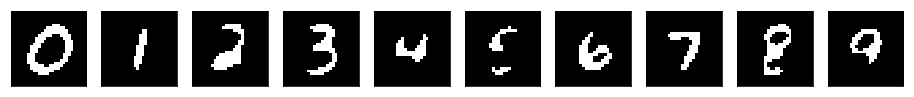

In [10]:
cm = np.array(mean).copy()
cm = np.where(cm > 127, 1, 0)
fig, figarr = plt.subplots(1, 10, figsize=(16, 16))
for i in range(10):
    figarr[i].imshow(cm[i], cmap='gray')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)
plt.show()

# Discrete mode

In [11]:
nb_dict = {}
for category in range(10):
    tmp = np.ones((32, 784))
    for index in ans_dict[category]:
        img = np.array(total[index]).reshape(784, 1)
        for pixel, value in enumerate(img):
            tmp[int(value/8)][pixel] += 1
    nb_dict[category] = tmp
    print('%s is already' % category)


0 is already
1 is already
2 is already
3 is already
4 is already
5 is already
6 is already
7 is already
8 is already
9 is already


In [12]:
error = 0
N = 10000
for tid in range(N):
    prob_list = []
    for category in range(10):
        class_num = len(ans_dict[category])+32
        test_img = np.array(ts_total[tid]).reshape(784, 1)
        prob = 1.0
        for pixel, value in enumerate(test_img):
            if pixel % 10 == 0:
                prob = prob * 100
            prob = prob * nb_dict[category][int(value/8), pixel] / class_num
        prob = prob * pclass[category]
        prob_list.append(prob)
    prob_list = np.array(prob_list)
    my_ans = np.argmax(prob_list)
    prob_list = prob_list / prob_list.sum()
    print('Postirior : ')
    for index, each_prob in enumerate(prob_list):
        print('%d: %.10f' % (index, each_prob))
    print('Predict: %d, Ans: %d\n' % (my_ans, ts_ans[tid]))
    if my_ans != ts_ans[tid]:
        error += 1
        
print('error rate : %.4f' % (error/N))

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0006616686
4: 0.0000000000
5: 0.9993383314
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9313866536
4: 0.0000000000
5: 0.0686133464
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9969029388
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0030970612
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0007146676
5: 0.0000001386
6: 0.0000000000
7: 0.0000000000
8: 0.0000210792
9: 0.9992641146
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999997
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000003
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0018928171
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9981071829
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999950639
3: 0.0000049361
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999966269
4: 0.0000000000
5: 0.0000033731
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.4810733568
8: 0.0000000000
9: 0.5189266432
Predict: 9, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999726853
8: 0.0000000000
9: 0.0000273147
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000001
5: 0.0000000000
6: 0.0000000000
7: 0.0000002237
8: 0.0000000000
9: 0.9999997762
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0027378091
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0323765236
8: 0.0048256377
9: 0.9600600295
Predict: 9, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999999
6: 0.0000000000
7: 0.0000000001
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999996
8: 0.0000000000
9: 0.0000000004
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999999998
3: 0.0000000002
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000390
4: 0.0000000000
5: 0.9999823406
6: 0.0000000000
7: 0.0000000000
8: 0.0000176203
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000020003
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999979997
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.4609189307
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.5390810693
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.3403014778
1: 0.0000000000
2: 0.0000000000
3: 0.0033296521
4: 0.0000000000
5: 0.6563688701
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.4826144605
4: 0.0000000001
5: 0.5173855394
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0001670482
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9998329518
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0018444419
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9981555581
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0011311053
4: 0.0000000000
5: 0.0110219056
6: 0.0003564596
7: 0.0000000000
8: 0.9874905279
9: 0.0000000015
Predict: 8, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9996403517
4: 0.0000000000
5: 0.0003596483
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999970142
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000029858
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999999
6: 0.0000000000
7: 0.0000000000
8: 0.0000000001
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999018
4: 0.0000000000
5: 0.0000000982
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000039
5: 0.0000000000
6: 0.0000000000
7: 0.9999999961
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999825753
4: 0.0000000000
5: 0.0000000004
6: 0.0000000000
7: 0.0000174242
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999861
4: 0.0000000000
5: 0.0000000139
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999991
6: 0.0000000000
7: 0.0000000000
8: 0.0000000009
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000072
6: 0.0000000000
7: 0.0000000000
8: 0.9999999928
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000026136
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999973864
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999998
4: 0.0000000000
5: 0.0000000002
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000048429
5: 0.0000000000
6: 0.0000000000
7: 0.0000000008
8: 0.0000000000
9: 0.9999951563
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9438923208
5: 0.0000000000
6: 0.0561076767
7: 0.0000000000
8: 0.0000000000
9: 0.0000000025
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000004
8: 0.9999894035
9: 0.0000105962
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000003
5: 0.0000000000
6: 0.0000000000
7: 0.0000011653
8: 0.0000000000
9: 0.9999988344
Predict: 9, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999920
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000080
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000268128
6: 0.0000000000
7: 0.0000000013
8: 0.0022756444
9: 0.9976975415
Predict: 9, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000001
6: 0.0000000000
7: 0.0000000000
8: 0.9999999999
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9286434942
4: 0.0000000000
5: 0.0713565058
6: 0.0000000000
7: 0.0000000000
8: 0.0000000001
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999830332
8: 0.0000000000
9: 0.0000169668
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000014969
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9992895803
8: 0.0000000000
9: 0.0007089227
Predict: 7, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9386151132
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0613848868
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000282
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999999718
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0101952230
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9898047770
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000007093
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999992907
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999988346
8: 0.0000000000
9: 0.0000011654
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0066893678
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000003
7: 0.0000000000
8: 0.9933106215
9: 0.0000000103
Predict: 8, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999875595
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000124405
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999885073
8: 0.0000000000
9: 0.0000114927
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.2254515430
3: 0.0000000017
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.7745484553
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999916684
3: 0.0000083316
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000040
1: 0.0000000000
2: 0.0000000257
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.9999999703
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000039
6: 0.0000000000
7: 0.0000021933
8: 0.0000000000
9: 0.9999978028
Predict: 9, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.1891536845
2: 0.0000000159
3: 0.8108462996
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9969781404
8: 0.0000000000
9: 0.0030218596
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000258585
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999741415
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000029
6: 0.0000000000
7: 0.0000000000
8: 0.9999999971
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9939160673
6: 0.0060839327
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000004
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999994404
8: 0.0000000001
9: 0.0000005592
Predict: 7, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000001198
3: 0.0137811964
4: 0.0000000002
5: 0.9861631120
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000555717
Predict: 5, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 3

Postirior : 
0: 0.0000003905
1: 0.0000000000
2: 0.9999996095
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0022324922
8: 0.9977675078
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999999
4: 0.0000000000
5: 0.0000000001
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000003
4: 0.0000000000
5: 0.9999999160
6: 0.0000000000
7: 0.0000000000
8: 0.0000000836
9: 0.0000000000
Predict: 5, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999076126
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000923874
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0002155364
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000012
9: 0.9997844623
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0004942666
4: 0.0000000000
5: 0.9995057334
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.9999995100
2: 0.0000000000
3: 0.0000000000
4: 0.0000004900
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000095848
4: 0.0000000000
5: 0.9999904152
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000007
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999993
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000011
6: 0.0000000000
7: 0.0000000000
8: 0.9999999989
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999987691
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000012309
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999997911
4: 0.0000000000
5: 0.0000002089
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000922178
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999060077
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000017745
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999582621
5: 0.0000107369
6: 0.0000000000
7: 0.0000000000
8: 0.0000310008
9: 0.0000000002
Predict: 4, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000001318
8: 0.0000000000
9: 0.9999998682
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.6253594803
5: 0.0000000005
6: 0.0000000000
7: 0.0000000000
8: 0.0000005658
9: 0.3746399534
Predict: 4, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999998616
4: 0.0000000000
5: 0.0000001384
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0004383732
5: 0.0000000000
6: 0.9995616268
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0003894284
3: 0.0000000000
4: 0.9996105716
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.3009918775
5: 0.0000000000
6: 

Postirior : 
0: 0.9995165966
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0004834034
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999999926
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000074
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0883803239
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9079812461
8: 0.0036384300
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000739
3: 0.0000000000
4: 0.0000000000
5: 0.8671341515
6: 0.0000000000
7: 0.0000000000
8: 0.1328657746
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.9999999999
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000001
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000187
1: 0.0000000000
2: 0.9999858460
3: 0.0000000000
4: 0.0000137681
5: 0.0000000000
6: 0.0000003625
7: 0.0000000000
8: 0.0000000000
9: 0.0000000047
Predict: 2, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000199
8: 0.0000000000
9: 0.9999999801
Predict: 9, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000007
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999999993
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000729305
3: 0.0002082880
4: 0.0000000000
5: 0.0000046108
6: 0.0000000000
7: 0.0000000000
8: 0.9997141707
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9210106953
4: 0.0000000000
5: 0.0784411320
6: 0.0000000000
7: 0.0000000000
8: 0.0005481727
9: 0.0000000000
Predict: 3, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000202
3: 0.9999999798
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0567336381
3: 0.0000019846
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9432643774
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 0.9999999994
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000006
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000004682
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999995318
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999789165
4: 0.0000000000
5: 0.0000000001
6: 0.0000000000
7: 0.0000000000
8: 0.0000210834
9: 0.0000000000
Predict: 3, Ans: 8

Postirior : 
0: 0.2269110885
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.7730889115
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0329514613
4: 0.0000000000
5: 0.9670485387
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000007479
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999992521
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000326404
4: 0.0000000000
5: 0.9999673580
6: 0.0000000000
7: 0.0000000000
8: 0.0000000016
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999910
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000090
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.1355385738
4: 0.0000000000
5: 0.8644614262
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.8342972948
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000001
6: 0.0000000000
7: 0.0000000000
8: 0.1657027051
9: 0.0000000000
Predict: 1, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000002
2: 0.0000000195
3: 0.0000000001
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999995845
8: 0.0000000002
9: 0.0000003956
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999879245
5: 0.0000001521
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000119233
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999988373
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000011627
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000304846
3: 0.9999695154
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999989
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000011
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999933691
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000066309
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000279
1: 0.0000000000
2: 0.0000000000
3: 0.9999998105
4: 0.0000000000
5: 0.0000001615
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000001
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999999999
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000241607
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000018
8: 0.0000000000
9: 0.9999999982
Predict: 9, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0003730144
3: 0.0000000000
4: 0.9996269841
5: 0.0000000000
6: 0.0000000015
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000068516
3: 0.0002624810
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9997306672
8: 0.0000000000
9: 0.0000000001
Predict: 7, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999475
6: 0.0000000525
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 6

Postirior : 
0: 0.0000000012
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.9999999988
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.9911036271
1: 0.0000000000
2: 0.0000000000
3: 0.0001591520
4: 0.0000000000
5: 0.0000043515
6: 0.0087328695
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000003411
5: 0.9999996589
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9987945896
4: 0.0000000000
5: 0.0012054104
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999990
6: 0.0000000000
7: 0.0000000000
8: 0.0000000010
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9972347143
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0027652857
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000023190
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000001
9: 0.9999976809
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000347945
3: 0.0000000000
4: 0.9998864463
5: 0.0000000000
6: 0.0000787591
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0006540830
4: 0.0000000000
5: 0.9993456406
6: 0.0000002763
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000124
6: 0.0000000000
7: 0.0000000000
8: 0.9999999876
9: 0.0000000000
Predict: 8, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999880
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000120
Predict: 4, Ans: 4

Postirior : 
0: 0.9998514567
1: 0.0000000000
2: 0.0000000000
3: 0.0000070772
4: 0.0000000000
5: 0.0001414661
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000050
5: 0.0000000000
6: 0.9999999950
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.1353679171
4: 0.0000000000
5: 0.8646320829
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000655670
1: 0.0000000000
2: 0.0000000000
3: 0.0000000103
4: 0.0000000000
5: 0.9999344227
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000223
2: 0.0000000000
3: 0.9999999777
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000004596
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999995404
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9997292950
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0002707050
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000008
6: 0.0000000000
7: 0.0000000000
8: 0.9999999992
9: 0.0000000000
Predict: 8, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000001365
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999998635
Predict: 9, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0014828474
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9985171526
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999976
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000024
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000403154
6: 0.9999596846
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000043
3: 0.8084217354
4: 0.0352939335
5: 0.1562843267
6: 0.0000000000
7: 0.0000000000
8: 

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000032869
8: 0.0000000000
9: 0.9999967131
Predict: 9, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.9999991425
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000008575
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999695
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000305
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000018
5: 0.0000000000
6: 0.9999999982
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999872984
3: 0.0000127016
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9985170217
8: 0.0000000000
9: 0.0014829783
Predict: 7, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999985
8: 0.0000000000
9: 0.0000000015
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999809332
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000190668
Predict: 5, Ans: 5

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0062769789
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9937230211
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000011
3: 0.0000000000
4: 0.9999999989
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9997130251
4: 0.0000000000
5: 0.0002869744
6: 0.0000000000
7: 0.0000000000
8: 0.0000000005
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.9999795894
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000204106
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000008
5: 0.0000000000
6: 0.0000000000
7: 0.0136179510
8: 0.0000000000
9: 0.9863820482
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000003147
4: 0.9842888163
5: 0.0157108657
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000033
Predict: 4, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000003
8: 0.0000000000
9: 0.9999999997
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0003974516
8: 0.0000000000
9: 0.9996025484
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0085215292
6: 0.0000000000
7: 0.9914784704
8: 0.0000000000
9: 0.0000000003
Predict: 7, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9957010249
4: 0.0000000000
5: 0.0042989751
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000003038
1: 0.0000000000
2: 0.0000000000
3: 0.0000000161
4: 0.0000000000
5: 0.0000012724
6: 0.9999984076
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0001970862
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.9998029138
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000428
6: 0.0000000000
7: 0.0000000000
8: 0.9999999572
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999483424
4: 0.0000000000
5: 0.0000516576
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000487
4: 0.0000000000
5: 0.0000000084
6: 0.0000000000
7: 0.0000000000
8: 0.9999999429
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000002217
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9989732828
9: 0.0010264955
Predict: 8, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999399
5: 0.0000000000
6: 0.0000000001
7: 0.0000000000
8: 0.0000000000
9: 0.0000000600
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999893
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000107
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0007696729
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9992303271
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000023990
4: 0.0000000000
5: 0.0000816837
6: 0.0000000000
7: 0.0000000000
8: 0.9999159173
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999998949
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000001051
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.2384209816
5: 0.7595521263
6: 0.0000000063
7: 0.0020267822
8: 0.0000000000
9: 0.0000001036
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9751838395
6: 0.0248161605
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999594694
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000405306
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999992
6: 0.0000000000
7: 0.0000000000
8: 0.0000000008
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9982440700
6: 0.0000000000
7: 0.0017559300
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.5040140334
2: 0.4959851269
3: 0.0000008395
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000002
9: 0.0000000000
Predict: 1, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999859
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000141
Predict: 4, Ans: 4

Postirior : 
0: 0.4390748203
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000002
8: 0.0000000000
9: 0.9999999998
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.4958064458
4: 0.0000000000
5: 0.5041935542
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000010
4: 0.0000000000
5: 0.9999999990
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000025
5: 0.0000000849
6: 0.0000000000
7: 0.0000000000
8: 0.0003032394
9: 0.9996966732
Predict: 9, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999977319
4: 0.0000000000
5: 0.0000022681
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000009
3: 0.9999999991
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999977
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000023
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000002
8: 0.0000000000
9: 0.9999999998
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000001
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9957882274
6: 0.0000000000
7: 0.0000000000
8: 0.0042117726
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000132049
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999867951
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0006028964
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9993971036
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.7527146167
5: 0.0000015516
6: 0.0000000000
7: 0.0000000000
8: 0.0000004701
9: 0.2472833617
Predict: 4, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0238374539
8: 0.0000000000
9: 0.9761625461
Predict: 9, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999981
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000019
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000012017
3: 0.9999987983
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000003
6: 0.0000000000
7: 0.0000004041
8: 0.9999976556
9: 0.0000019400
Predict: 8, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0360600584
8: 0.0016822442
9: 0.9622576974
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0433070508
8: 0.0000000000
9: 0.9566929492
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999975
4: 0.0000000000
5: 0.0000000025
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999881
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000119
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999989
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000011
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000001
3: 0.0000416139
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999583860
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999997909
3: 0.0000002091
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000002
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999999998
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.9999999956
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000005
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000039
Predict: 1, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999999
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.7778839398
5: 0.0000000003
6: 0.0629824970
7: 0.0000000000
8: 0.0000000000
9: 0.1591335628
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.2376009733
4: 0.0000000000
5: 0.7623981687
6: 0.0000000000
7: 0.0000000000
8: 0.0000008580
9: 0.0000000000
Predict: 5, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000001673
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999998327
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.9999953285
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000046513
6: 0.0000000000
7: 0.0000000000
8: 0.0000000203
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.1758332880
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.8241667120
Predict: 9, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999999
4: 0.0000000000
5: 0.0000000001
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.9774868112
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000122
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0225131766
9: 0.0000000000
Predict: 0, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0012374957
4: 0.0000000000
5: 0.0167539026
6: 0.0000000000
7: 0.0000000000
8: 0.9820086017
9: 0.0000000000
Predict: 8, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000041
6: 0.0000000000
7: 0.0000000000
8: 0.9999999959
9: 0.0000000000
Predict: 8, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000001
5: 0.0000000000
6: 0.0000000000
7: 0.0000853779
8: 0.0000000000
9: 0.9999146220
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9976770258
9: 0.0023229742
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9979346919
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0020653081
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000038
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9995340040
8: 0.0000000000
9: 0.0004659960
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999999943
6: 0.0000000000
7: 0.0000000057
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.8250263625
4: 0.0000000000
5: 0.1749736375
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.9999998208
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000001792
9: 0.0000000000
Predict: 1, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.9937198971
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0062801029
9: 0.0000000000
Predict: 1, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.8952311572
8: 0.0000000000
9: 0.1047688428
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.9999998984
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000001016
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999583
4: 0.0000000000
5: 0.0000000417
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999787
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000213
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0028310684
6: 0.9971689316
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000010030
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9993631928
6: 0.0006358042
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0058638388
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9941361612
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.9999998775
2: 0.0000001177
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000049
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999840741
4: 0.0000000000
5: 0.0000159259
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.6375051638
5: 0.0000000000
6: 0.3624948362
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.5417390419
8: 0.0000000000
9: 0.4582609581
Predict: 7, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0009347671
3: 0.9990651958
4: 0.0000000000
5: 0.0000000371
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999490300
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000509700
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999735488
6: 0.0000227518
7: 0.0000000000
8: 0.0000036994
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.8125338180
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.1874661820
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.9999995772
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000004228
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999999
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000001
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.1155516838
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.8844483162
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999993
8: 0.0000000000
9: 0.0000000007
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999415
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000585
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.5038307207
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000970293
9: 0.4960722500
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0260913911
2: 0.0000000000
3: 0.0000000000
4: 0.0004188044
5: 0.9734898046
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999983671
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000016329
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000001
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999983
8: 0.0000000015
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.9998157631
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000347617
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999652383
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000352665
4: 0.0000000000
5: 0.0000064956
6: 0.0000000000
7: 0.0000000000
8: 0.9999582379
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.9999998628
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000001372
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999958578
4: 0.0000000000
5: 0.0000041406
6: 0.0000000016
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.2440480509
4: 0.0000000000
5: 0.0000081755
6: 0.0000000000
7: 0.0000000000
8: 0.7559437736
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999766157
4: 0.0000000000
5: 0.0000233839
6: 0.0000000000
7: 0.0000000000
8: 0.0000000004
9: 0.0000000000
Predict: 3, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0138913638
4: 0.0000000000
5: 0.9861086362
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 3

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000024501
6: 0.0000000000
7: 0.0000000020
8: 0.5471308927
9: 0.4528666552
Predict: 8, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0069512668
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9930487332
Predict: 9, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000012
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999999988
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0156171124
3: 0.0000000000
4: 0.9843825684
5: 0.0000000000
6: 0.0000003191
7: 0.0000000000
8: 0.0000000000
9: 0.0000000002
Predict: 4, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.4571225514
3: 0.0000000000
4: 0.1029902195
5: 0.0000000000
6: 0.1410325579
7: 0.0000000000
8: 0.2988546713
9: 0.0000000000
Predict: 2, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0044293511
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9955706489
9: 0.0000000000
Predict: 8, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000110777
7: 0.0000000000
8: 0.9999889223
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999899
8: 0.0000000101
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000066
3: 0.9999999934
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.9999976963
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000023037
9: 0.0000000000
Predict: 0, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.5844677380
6: 0.4155322620
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0055047019
6: 0.0000000000
7: 0.0000000000
8: 0.9944952981
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999993539
8: 0.0000000000
9: 0.0000006461
Predict: 7, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999855433
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000144567
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9999434322
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000565678
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0012341368
8: 0.0000000000
9: 0.9987658632
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000003
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999996
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000001
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0002682860
2: 0.0000000000
3: 0.9907288248
4: 0.0000000000
5: 0.0000028776
6: 0.0000000000
7: 0.0000000000
8: 0.0090000117
9: 0.0000000000
Predict: 3, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999622735
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000377265
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999999998
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000002
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000215918
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999784082
Predict: 9, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9979831743
4: 0.0000000000
5: 0.0020168257
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 5

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.8243675622
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.1756324378
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000001
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999999999
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.9999999733
4: 0.0000000000
5: 0.0000000267
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000010
5: 0.9999999987
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000003
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9774690107
3: 0.0021991223
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0203318671
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000001612
6: 0.0000000000
7: 0.0000000000
8: 0.8042500058
9: 0.1957498329
Predict: 8, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0004425792
5: 0.0000000000
6: 0.0000000000
7: 0.9911848845
8: 0.0000000000
9: 0.0083725363
Predict: 7, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000013
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999999987
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000013
4: 0.0000000000
5: 0.9999999987
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000005
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.9999999995
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999985
8: 0.0000000000
9: 0.0000000015
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 1.0000000000
Predict: 9, Ans: 9

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999992876
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000007124
Predict: 4, Ans: 4

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.8870571346
8: 0.0000000000
9: 0.1129428654
Predict: 7, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9997138847
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0002861153
Predict: 4, Ans: 9

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.9999998819
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000001181
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 1.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 1.0

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.2279207602
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.7720792398
9: 0.0000000000
Predict: 8, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 1.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.5002587652
6: 0.4997412348
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.9999996600
1: 0.0000000000
2: 0.0000003400
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000008313
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999991687
9: 0.0000000000
Predict: 8, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000049214
6: 0.9999950786
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 1.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000027
3: 0.0000000000
4: 0.1746101472
5: 0.8253898501
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 5, Ans: 5

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9983773005
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0016226995
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 1.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 3, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.9997095934
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0002904066
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 1.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 1.0000000000
9: 0.0000000000
Predict: 8, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 1.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000006235
6: 0.0000000000
7: 0.0000000000
8: 0.9999993765
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.9998047455
2: 0.0001952511
3: 0.0000000000
4: 0.0000000000
5: 0.0000000002
6: 0.0000000000
7: 0.0000000000
8: 0.0000000032
9: 0.0000000000
Predict: 1, Ans: 1

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.9996858046
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0003141954
9: 0.0000000000
Predict: 2, Ans: 2

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000004
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.9999999996
9: 0.0000000000
Predict: 8, Ans: 3

Postirior : 
0: 0.0000000000
1: 0.0

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.9999999689
8: 0.0000000000
9: 0.0000000311
Predict: 7, Ans: 7

Postirior : 
0: 0.0000000000
1: 0.0000238788
2: 0.0000000000
3: 0.0326695417
4: 0.0000000000
5: 0.0000002521
6: 0.0000000000
7: 0.0000000000
8: 0.9673063275
9: 0.0000000000
Predict: 8, Ans: 8

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.9999985447
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000014553
Predict: 4, Ans: 4

Postirior : 
0: 0.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 1.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 6, Ans: 6

Postirior : 
0: 1.0000000000
1: 0.0000000000
2: 0.0000000000
3: 0.0000000000
4: 0.0000000000
5: 0.0000000000
6: 0.0000000000
7: 0.0000000000
8: 0.0000000000
9: 0.0000000000
Predict: 0, Ans: 0

Postirior : 
0: 0.0000000000
1: 0.0

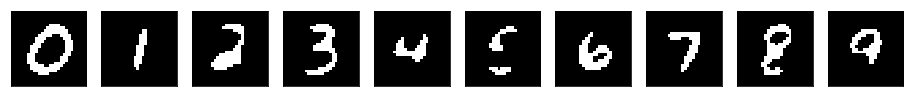

In [13]:
fig, figarr = plt.subplots(1, 10, figsize=(16, 16))
for category in range(10):
    d_image = np.zeros((1, 784))
    for pixel in range(784):
        if nb_dict[category][:16, pixel].sum() < nb_dict[category][16:, pixel].sum():
            d_image[:,pixel] = 1
#     print('%r\t' % np.array_equal(cm[category], d_image.reshape((28,28))), end='')
    figarr[category].imshow(d_image.reshape((28,28)), cmap='gray')
    figarr[category].axes.get_xaxis().set_visible(False)
    figarr[category].axes.get_yaxis().set_visible(False)
plt.show()

# Online learning 

In [14]:
def likelihood(toss , succ):
    tmp = 1
    for i in range(succ):
        tmp = tmp * (toss-i)/(i+1)
    tmp = tmp * pow(succ/toss, succ)
    tmp = tmp * pow(1-succ/toss, toss-succ)
    return tmp

In [15]:
string = '0101010101001011010101 0110101 010110101101 0101101011101011010 111101100011110 101110111000110 1010010111 11101110110 01000111101 110100111 01101010111'
trails = string.split(' ')
# trails

In [16]:
head = 0
tail = 0
a = 0
b = 0
times = 1
for trail in trails:
    print('case %d: %s' % (times, trail))
    a = trail.count('1')
    b = trail.count('0')
    likeli = likelihood(a+b, a)
    print('Likelihood: %.17f' % likeli)
    print('beta prior : a = %d, b = %d' % (head, tail))
    head += a
    tail += b
    print('beta prior : a = %d, b = %d' % (head, tail))
    times += 1
    print()

case 1: 0101010101001011010101
Likelihood: 0.16818809509277344
beta prior : a = 0, b = 0
beta prior : a = 11, b = 11

case 2: 0110101
Likelihood: 0.29375515303997485
beta prior : a = 11, b = 11
beta prior : a = 15, b = 14

case 3: 010110101101
Likelihood: 0.22860542417943350
beta prior : a = 15, b = 14
beta prior : a = 22, b = 19

case 4: 0101101011101011010
Likelihood: 0.18286870706509092
beta prior : a = 22, b = 19
beta prior : a = 33, b = 27

case 5: 111101100011110
Likelihood: 0.21430705488578330
beta prior : a = 33, b = 27
beta prior : a = 43, b = 32

case 6: 101110111000110
Likelihood: 0.20659760529408000
beta prior : a = 43, b = 32
beta prior : a = 52, b = 38

case 7: 1010010111
Likelihood: 0.25082265600000003
beta prior : a = 52, b = 38
beta prior : a = 58, b = 42

case 8: 11101110110
Likelihood: 0.26196789328644571
beta prior : a = 58, b = 42
beta prior : a = 66, b = 45

case 9: 01000111101
Likelihood: 0.23609128871506807
beta prior : a = 66, b = 45
beta prior : a = 72, b = 50